In [1]:
from matplotlib.gridspec import GridSpec
from netCDF4 import Dataset
import matplotlib
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import LogNorm
import matplotlib.lines as mlines
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import xarray as xr
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as mcols
import glob 
import colorcet as cc
import netCDF4
import cmaps
from scipy.interpolate import interp2d
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import matplotlib.gridspec as gridspec
import seaborn as sns
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pyproj import Proj
# from wrf import getvar, interplevel, to_np, latlon_coords, get_cartopy, cartopy_xlim, cartopy_ylim
from colorspacious import cspace_converter
import pathlib
from pathlib import Path
import numpy.ma as ma
from numpy import genfromtxt
import pandas as pd
import calendar
from IPython.core.pylabtools import figsize
from scipy import stats
from collections import Counter
from scipy.stats import mannwhitneyu
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

/home/disk/orca/csmall3/anaconda3/envs/new_2025_env/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Objective
The goal here is to fully flesh out what's going on with the chosen case studies. In this case, that means plotting the following:
- Hovmollers for moisture
- MJO and AR lifetime development

In [2]:
#bring in the West Coast Boundary
WC_IMERG_mask = xr.open_dataset('/home/disk/orca/csmall3/AR_testing_research/state_masks/US_West_Coast_mask_IMERG.nc')
# WC_IMERG_mask['lat'] = WC_IMERG_mask['lat'][::-1]
mask_ary = WC_IMERG_mask['Mask']
WC_bound = mask_ary

In [3]:
mjo_act_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_MJO_Active_ARs_UPDATE.csv')
mjo_act_og = mjo_act_og.drop(columns=['Unnamed: 0'])

mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_MJO_Connected_ARs_UPDATE.csv')
mjo_og = mjo_og.drop(columns=['Unnamed: 0'])

non_mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_Non_MJO_ARs_UPDATE.csv')
non_mjo_og = non_mjo_og.drop(columns=['Unnamed: 0'])

#filter them by DJFM

dec=mjo_act_og[mjo_act_og['Month'] == 12]
jan=mjo_act_og[mjo_act_og['Month'] == 1]
feb=mjo_act_og[mjo_act_og['Month'] == 2]
mar=mjo_act_og[mjo_act_og['Month'] == 3]

mjo_act_djfm=pd.concat([dec, jan, feb, mar], ignore_index=True)


dec=mjo_og[mjo_og['Month'] == 12]
jan=mjo_og[mjo_og['Month'] == 1]
feb=mjo_og[mjo_og['Month'] == 2]
mar=mjo_og[mjo_og['Month'] == 3]

mjo_conn_djfm=pd.concat([dec, jan, feb, mar], ignore_index=True)

dec=non_mjo_og[non_mjo_og['Month'] == 12]
jan=non_mjo_og[non_mjo_og['Month'] == 1]
feb=non_mjo_og[non_mjo_og['Month'] == 2]
mar=non_mjo_og[non_mjo_og['Month'] == 3]

non_mjo_djfm=pd.concat([dec, jan, feb, mar], ignore_index=True)

mjo_act_djfm.sort_values(by='Max ERM', ascending=False, inplace=True, ignore_index=True)
mjo_conn_djfm.sort_values(by='Max ERM', ascending=False, inplace=True, ignore_index=True)
non_mjo_djfm.sort_values(by='Max ERM', ascending=False, inplace=True, ignore_index=True)

In [4]:
#remember that Brandon updated the directories!

xr.open_dataset('/home/orca/bkerns/projects/mjo_lpt_and_ar/tracking/lpt-python-public-2024/ar.testing7.merge_split/data/ar/g0_0h/thresh1/systems/2022060100_2023063023/lpt_system_mask_ar.lptid00386.5000.nc')

<xarray.Dataset>
Dimensions:                       (lat: 721, lon: 1440, time: 268, n: 1)
Coordinates:
  * n                             (n) int32 1
  * time                          (time) datetime64[ns] 2022-12-21T17:00:00 ....
  * lon                           (lon) float32 0.0 0.25 0.5 ... 359.5 359.8
  * lat                           (lat) float32 90.0 89.75 89.5 ... -89.75 -90.0
Data variables: (12/21)
    grid_area                     (lat, lon) float32 ...
    centroid_lon                  (time) float64 ...
    centroid_lat                  (time) float64 ...
    area                          (time) float64 ...
    largest_object_centroid_lon   (time) float64 ...
    largest_object_centroid_lat   (time) float64 ...
    ...                            ...
    lptid                         (n) float64 ...
    duration                      (n) float64 ...
    maxarea                       (n) float64 ...
    zonal_propagation_speed       (n) float64 ...
    meridional_propagation_speed  (n) float64 ...
    mask                          (time, lat, lon) int8 ...

In [5]:
non_mjo_djfm

AR ID (string)    Landfall Datetime  \
0   /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2024-03-29T17:00:00   
1   /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2009-02-08T19:00:00   
2   /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2019-02-24T21:00:00   
3   /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2011-01-14T15:00:00   
4   /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2012-12-16T03:00:00   
5   /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2017-03-13T08:00:00   
6   /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2001-01-10T16:00:00   
7   /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2001-01-09T16:00:00   
8   /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2021-03-14T10:00:00   
9   /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2006-03-24T22:00:00   
10  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2017-02-27T10:00:00   
11  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2017-03-10T21:00:00   
12  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2023-03-28T00:00:00   
13  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2019-12-12T16:00:00   
14  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2019-12-10T22:00:00   
15  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2002-03-09T18:00:00   
16  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2020-12-07T07:00:00   
17  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2002-03-11T05:00:00   
18  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2011-01-20T14:00:00   
19  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2011-01-12T22:00:00   
20  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2017-03-08T23:00:00   
21  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2001-03-24T14:00:00   
22  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2017-03-03T17:00:00   
23  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2023-12-25T02:00:00   
24  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2023-12-28T16:00:00   
25  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2020-12-05T21:00:00   
26  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2021-03-18T06:00:00   
27  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2024-01-02T12:00:00   
28  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2009-01-27T22:00:00   
29  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2001-03-15T09:00:00   
30  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2001-03-27T18:00:00   
31  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2015-03-25T15:00:00   
32  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2011-02-03T15:00:00   
33  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2021-03-24T12:00:00   
34  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2001-01-17T20:00:00   
35  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2002-03-06T16:00:00   
36  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2001-04-05T20:00:00   
37  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2008-03-07T22:00:00   
38  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2023-03-02T11:00:00   
39  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2015-03-29T12:00:00   
40  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2002-04-01T00:00:00   
41  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2002-02-27T16:00:00   

     Max ERM     Max IVT  End Season Year  Month  AR ID (Number)  
0   2.657752  1840.54500             2023      3          511.01  
1   2.621122   982.22340             2008      2          488.40  
2   2.327383   848.53320             2018      2          469.10  
3   1.858908  1956.18690             2010      1          371.10  
4   1.829597  1464.60700             2012     12          414.10  
5   1.822730  1056.46010             2016      3          549.03  
6   1.792372   730.10815             2000      1          459.00  
7   1.518014  1868.18460             2000      1          458.80  
8   1.506216   952.24270             2020      3          478.30  
9   1.504605  

In [17]:
mjo_act_djfm

AR ID (string)    Landfall Datetime  \
0    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2010-12-14T03:00:00   
1    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2017-01-07T09:00:00   
2    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2005-01-08T17:00:00   
3    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2017-02-05T13:00:00   
4    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2023-01-06T17:00:00   
..                                                 ...                  ...   
310  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2008-03-03T11:00:00   
311  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2007-03-31T02:00:00   
312  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2006-02-11T10:00:00   
313  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2006-12-29T16:00:00   
314  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2006-02-12T21:00:00   

      Max ERM    Max IVT  End Season Year  Month  AR ID (Number)  
0    5.356253  1228.1925             2010   12.0          314.40  
1    5.235799  1184.5072             2016    1.0          446.10  
2    4.520205   866.1238             2004    1.0          404.50  
3    4.502615  1634.8346             2016    2.0          486.10  
4    4.250397  1748.2942             2022    1.0          419.20  
..        ...        ...              ...    ...             ...  
310  0.398473  1468.8276             2007    3.0          509.30  
311  0.318897  1124.7683             2006    3.0          500.30  
312  0.296706  1464.0636             2005    2.0          507.10  
313  0.273069  1616.2050             2006   12.0          287.22  
314  0.257451  1191.5931             2005    2.0          512.10  

[315 rows x 7 columns]

In [20]:
mjo_act_djfm['AR ID (string)'].iloc[2]

'/home/orca/bkerns/projects/mjo_lpt_and_ar/tracking/lpt-python-public/ar.testing7.merge_split/data/ar/g0_0h/thresh1/systems/2004060100_2005063023/lpt_system_mask_ar.lptid00404.5000.nc'

In [7]:
mjo_conn_djfm

AR ID (string)    Landfall Datetime  \
0    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2022-12-24T08:00:00   
1    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2017-01-04T08:00:00   
2    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2017-01-16T22:00:00   
3    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2017-01-10T02:00:00   
4    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2006-01-03T13:00:00   
..                                                 ...                  ...   
100  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2023-02-10T01:00:00   
101  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2011-12-20T05:00:00   
102  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2014-01-18T15:00:00   
103  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2008-12-09T20:00:00   
104  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2014-01-15T19:00:00   

      Max ERM    Max IVT  End Season Year  Month  AR ID (Number)  
0    5.038845  2146.7937             2022     12          386.50  
1    3.531468   702.8931             2016      1          422.30  
2    3.337829  2063.2570             2016      1          438.50  
3    3.300837  1556.0400             2016      1          438.10  
4    3.237895  1791.0466             2005      1          402.40  
..        ...        ...              ...    ...             ...  
100  0.573124  1833.3120             2022      2          465.10  
101  0.517757  1742.2552             2011     12          380.30  
102  0.513015  1414.2023             2013      1          402.50  
103  0.473460  1429.2700             2008     12          158.43  
104  0.438557  1413.9075             2013      1          402.60  

[105 rows x 7 columns]

In [22]:
mjo_conn_djfm['AR ID (string)'].iloc[0]

'/home/orca/bkerns/projects/mjo_lpt_and_ar/tracking/lpt-python-public/ar.testing7.merge_split/data/ar/g0_0h/thresh1/systems/2022060100_2023063023/lpt_system_mask_ar.lptid00386.5000.nc'

In [12]:
ARs_2023_conn=mjo_conn_djfm[mjo_conn_djfm['End Season Year'] == 2023]

In [13]:
ARs_2023_conn

AR ID (string)    Landfall Datetime  \
14  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2024-01-27T05:00:00   
22  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2023-12-15T10:00:00   
33  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2024-01-17T00:00:00   

     Max ERM    Max IVT  End Season Year  Month  AR ID (Number)  
14  2.420666   785.3229             2023      1          378.00  
22  2.026306   886.9277             2023     12          311.12  
33  1.614801  1610.9443             2023      1          377.90

In [14]:
ARs_2023_act=mjo_act_djfm[mjo_act_djfm['End Season Year'] == 2023]

In [15]:
ARs_2023_act

AR ID (string)    Landfall Datetime  \
7    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2023-12-02T08:00:00   
17   /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2024-01-21T20:00:00   
18   /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2024-01-18T17:00:00   
49   /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2024-02-17T07:00:00   
54   /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2024-02-14T11:00:00   
76   /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2024-01-16T16:00:00   
112  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2024-02-25T17:00:00   
126  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2023-12-09T17:00:00   
152  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2024-03-22T00:00:00   
206  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2024-03-27T08:00:00   
224  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2023-12-24T14:00:00   
244  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2023-12-13T19:00:00   
252  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2024-02-25T16:00:00   
270  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2024-01-10T04:00:00   
275  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2024-02-23T13:00:00   
307  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2024-01-05T10:00:00   

      Max ERM     Max IVT  End Season Year  Month  AR ID (Number)  
7    3.463305  1650.15440             2023   12.0          311.04  
17   2.706330  1725.24760             2023    1.0          377.60  
18   2.703631   953.41730             2023    1.0          377.70  
49   1.948924   993.36690             2023    2.0          430.30  
54   1.869132   859.15190             2023    2.0          430.40  
76   1.614801  1714.83470             2023    1.0          377.50  
112  1.411790   563.88720             2023    2.0          441.10  
126  1.292317  1750.22580             2023   12.0          311.06  
152  1.119359   544.52510             2023    3.0          483.10  
206  0.936620  1288.28600             2023    3.0          496.10  
224  0.871079  1463.87960             2023   12.0          360.20  
244  0.772701  1336.43580             2023   12.0          311.05  
252  0.753581  1261.72950             2023    2.0          440.30  
270  0.657430    94.35453             2023    1.0          389.10  
275  0.632620  1209.35020             2023    2.0          440.20  
307  0.447106  1919.53650             2023    1.0          377.20

## Non-MJO 

### AR/MJO Lifecycle

In [4]:
ary_test = xr.open_dataset(non_mjo_djfm['AR ID (string)'].iloc[0])
mask_ary = ary_test['mask']

mask_lon = mask_ary['lon']
mask_lat = mask_ary['lat']

In [5]:
#create title string

start_year = str(mask_ary['time'][0].dt.year.values)
start_month = str(mask_ary['time'][0].dt.month.values)
start_day = str(mask_ary['time'][0].dt.day.values)
start_hour = str(mask_ary['time'][0].dt.hour.values)

start_dt_str = start_year+'-'+start_month+'-'+start_day+'-'+start_hour+':00'

end_year = str(mask_ary['time'][-1].dt.year.values)
end_month = str(mask_ary['time'][-1].dt.month.values)
end_day = str(mask_ary['time'][-1].dt.day.values)
end_hour = str(mask_ary['time'][-1].dt.hour.values)

end_dt_str = end_year+'-'+end_month+'-'+end_day+'-'+end_hour+':00'

/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:844: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:850: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:180: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/numpy/lib/function_base.py:5392: 

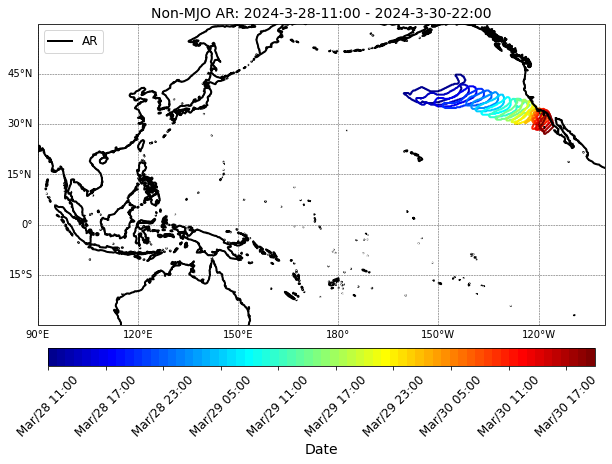

In [25]:
#plotting the MJO and AR Together
from scipy.ndimage import gaussian_filter
cm = 180


# Convert timestamps if needed
# If using xarray, get mask_time like this:
mask_time = mask_ary['time'].values

# Define plotting time indices
step = 3
time_indices = np.arange(0, len(mask_time), step)
selected_times = mask_time[time_indices]

# Define colormap
cmap = cmaps.matlab_jet
norm = Normalize(vmin=mdates.date2num(selected_times[0]), vmax=mdates.date2num(selected_times[-1]))

# Keep a list of contour handles to create a colorbar later
contour_handles = []

fig = plt.figure(figsize=[14, 7])
political_boundaries = NaturalEarthFeature(category='cultural', name='admin_0_boundary_lines_land', scale='50m', facecolor='none')
states = NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=cm))


ax.set_title('Non-MJO AR: '+start_dt_str+' - '+end_dt_str, fontsize=14, zorder = 26)					   
ax.add_feature(cartopy.feature.LAND, edgecolor='k', facecolor='none', zorder=24)
ax.coastlines('50m', linewidth=2, zorder=24)

minlon = 80 + cm
maxlon = -90 + cm

ax.set_extent([minlon, maxlon, -30, 60], ccrs.PlateCarree())

# Plot AR Contours
for i, t in enumerate(time_indices):
    if np.any(mask_ary[t]):
        color = cmap(norm(mdates.date2num(mask_time[t])))
        ax.contour(
            mask_lon, mask_lat, mask_ary[t], levels=[0.5],
            colors=[color], linewidths=2, transform=ccrs.PlateCarree(), zorder=12 + i * 0.01
        )

#Plot MJO Contours
# for i, t in enumerate(time_indices):
#     if np.any(mjo_array[t]):
#         color = cmap(norm(mdates.date2num(mask_time[t])))
#         ax.contour(
#             mjo_lon, mjo_lat, mjo_array[t], levels=[0.5],
#             colors=[color], linewidths=1, transform=ccrs.PlateCarree(),linestyles='dashdot', zorder=13 + i * 0.01
#         )

        
# Create colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', aspect=30, shrink=0.7, pad=0.06)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Date', fontsize=14)

# Format ticks: Month/Day Hour:Min
num_ticks = 10  # adjust for spacing
tick_times = selected_times[::max(len(selected_times)//num_ticks, 1)]
tick_nums = mdates.date2num(tick_times)
tick_labels = [pd.to_datetime(t).strftime('%b/%d %H:%M') for t in tick_times]

cbar.set_ticks(tick_nums)
cbar.set_ticklabels(tick_labels, rotation=45)



#try adding gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                linewidth=0.5, color='k', alpha=0.7, linestyle='--', zorder=25)

gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 90, 15))

# Create custom legend handles
# dashed_line = Line2D([0], [0], color='black', linewidth=1, linestyle='dashed', label='MJO LPT')
solid_line = Line2D([0], [0], color='black', linewidth=2, linestyle='-', label='AR')

# Add legend to the top center of the plot
# ax.legend(handles=[solid_line, dashed_line], loc='upper left', fontsize=12, frameon=True, ncol=2)
ax.legend(handles=[solid_line], loc='upper left', fontsize=12, frameon=True, ncol=2)
# plt.legend()
# plt.clabel(cdssss, inline = True,
#            fontsize=13, fmt='%1.2f', colors = 'gray', zorder = 26)
# ax.text(0.9, 0.05, "IVT: every 50 kg/m/s starting at 150 kg/m/s.", ha='right', color='gray', fontweight='bold', transform=ax.transAxes, zorder=26)
# plt.figtext(0.28, .07, 'Composite of IVT from June 2000 through June 2004', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/Non_MJO_Lifecycle_Map.png", dpi=350, bbox_inches='tight')
fig.show()

In [9]:
mask_ary['time'][0].dt.year.values

array(2024)

In [10]:
ar_year = str(mask_ary['time'][0].dt.year.values)
ar_month = str(mask_ary['time'][0].dt.month.values)
ar_day = str(mask_ary['time'][0].dt.day.values)
ar_hour = str(mask_ary['time'][0].dt.hour.values)

ar_dt_str = ar_year+'-'+ar_month+'-'+ar_day+'-'+ar_hour+':00'

In [11]:
ar_dt_str

'2024-3-28-11:00'

/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:844: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:850: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:180: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/numpy/lib/function_base.py:5392: 

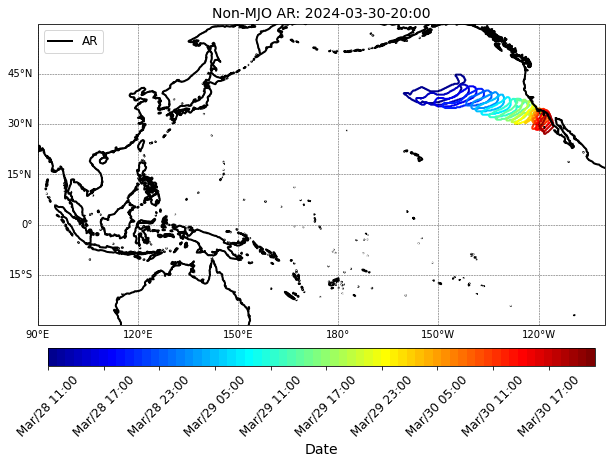

In [14]:
# Set up figure and map only once

from scipy.ndimage import gaussian_filter
cm = 180

# Convert timestamps if needed
# If using xarray, get mask_time like this:
mask_time = mask_ary['time'].values

# Define plotting time indices
step = 3
time_indices = np.arange(0, len(mask_time), step)
selected_times = mask_time[time_indices]

fig = plt.figure(figsize=[14, 7])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=cm))

# Add map features
ax.add_feature(cartopy.feature.LAND, edgecolor='k', facecolor='none', zorder=24)
ax.coastlines('50m', linewidth=2, zorder=24)
ax.set_extent([80 + cm, -90 + cm, -30, 60], ccrs.PlateCarree())

# Gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='k', alpha=0.7, linestyle='--', zorder=25)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 90, 15))

# Legend
solid_line = Line2D([0], [0], color='black', linewidth=2, linestyle='-', label='AR')
ax.legend(handles=[solid_line], loc='upper left', fontsize=12, frameon=True, ncol=2)

# Setup colorbar
cmap = cmaps.matlab_jet
norm = Normalize(vmin=mdates.date2num(mask_time[0]), vmax=mdates.date2num(mask_time[-1]))
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', aspect=30, shrink=0.7, pad=0.06)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Date', fontsize=14)

# Format ticks
num_ticks = 10
tick_times = selected_times[::max(len(selected_times)//num_ticks, 1)]
tick_nums = mdates.date2num(tick_times)
tick_labels = [pd.to_datetime(t).strftime('%b/%d %H:%M') for t in tick_times]
cbar.set_ticks(tick_nums)
cbar.set_ticklabels(tick_labels, rotation=45)

# Now, loop through time and add contours cumulatively
for i, t in enumerate(time_indices):
    if np.any(mask_ary[t]):
        color = cmap(norm(mdates.date2num(mask_time[t])))

        ax.contour(
            mask_lon, mask_lat, mask_ary[t], levels=[0.5],
            colors=[color], linewidths=2, transform=ccrs.PlateCarree(), zorder=12 + i * 0.01
        )

        

        # Time string for saving
        dt = pd.to_datetime(mask_ary['time'][t].values)
        ar_dt_str = dt.strftime('%Y-%m-%d-%H:%M')

        ax.set_title('Non-MJO AR: '+ar_dt_str, fontsize=14, zorder = 26)

        # Save frame with cumulative contours
        fig.savefig(f'/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/anim/Non_MJO/AR_{ar_dt_str}.png',
                    dpi=350, bbox_inches='tight')


### Moisture Hovmoller

In [79]:
tpw_stack = []

for xxxxxxx in range(0,len(ary_test['time'])):



    dt1 = pd.to_datetime(ary_test['time'].values[xxxxxxx])
    moi = str(dt1.month).rjust(2, '0')
    doi = str(dt1.day).rjust(2, '0')
    hoi = str(dt1.hour).rjust(2, '0')
    yoi = str(dt1.year)

    ldom = str(calendar.monthrange(dt1.year, dt1.month)[1]) #last day of month

    mask_ary = ary_test['mask'][xxxxxxx]
    mask_lon = ary_test['lon']
    mask_lat = ary_test['lat']




    #bring in mjo data
    fin_time = dt1
    year = dt1.year


    #bring in TPW data
    max_lat =10
    min_lat=-10
    min_lon=100 #-113.75
    max_lon=250 #-125.5

    tpw_test = xr.open_dataset('/home/orca/data/model_anal/era5/from_rda/tcwv/e5.oper.an.sfc.128_137_tcwv.ll025sc.'+yoi+moi+'0100_'+yoi+moi+ldom+'23.nc')

    LatIndexer, LonIndexer, TimeIndexer  = 'latitude', 'longitude', 'time'
    tpw_slice = tpw_test.sel(**{LatIndexer: slice(max_lat, min_lat),
                                LonIndexer: slice(min_lon, max_lon),
                    TimeIndexer: slice(dt1,dt1)})
    tpw_ary = tpw_slice['TCWV']

    tpw_stack += [tpw_ary]



In [80]:
## TPW for midlatitudes!!!
tpw_stack_mid = []

for xxxxxxx in range(0,len(ary_test['time'])):



    dt1 = pd.to_datetime(ary_test['time'].values[xxxxxxx])
    moi = str(dt1.month).rjust(2, '0')
    doi = str(dt1.day).rjust(2, '0')
    hoi = str(dt1.hour).rjust(2, '0')
    yoi = str(dt1.year)

    ldom = str(calendar.monthrange(dt1.year, dt1.month)[1]) #last day of month

    mask_ary = ary_test['mask'][xxxxxxx]
    mask_lon = ary_test['lon']
    mask_lat = ary_test['lat']





    fin_time = dt1
    year = dt1.year



    #bring in TPW data
    max_lat =50
    min_lat=30
    min_lon=100 #-113.75
    max_lon=250 #-125.5

    tpw_test = xr.open_dataset('/home/orca/data/model_anal/era5/from_rda/tcwv/e5.oper.an.sfc.128_137_tcwv.ll025sc.'+yoi+moi+'0100_'+yoi+moi+ldom+'23.nc')

    LatIndexer, LonIndexer, TimeIndexer  = 'latitude', 'longitude', 'time'
    tpw_slice = tpw_test.sel(**{LatIndexer: slice(max_lat, min_lat),
                                LonIndexer: slice(min_lon, max_lon),
                    TimeIndexer: slice(dt1,dt1)})
    tpw_ary = tpw_slice['TCWV']

    tpw_stack_mid += [tpw_ary]




In [81]:
tpw_array = xr.concat(tpw_stack, dim="time")
# mjo_array = xr.concat(mjo_lpt_stack, dim="time")
tpw_plot_mean = tpw_array.mean(dim='latitude')
mask_ary=ary_test['mask']

mask_lon=mask_ary['lon']
mask_time = mask_ary['time']

tpw_array_mid = xr.concat(tpw_stack_mid, dim="time")
# I need to average the above array such that I have the time, longitude, and the mean latitudinal tpw along each lon

tpw_plot_mean_mid = tpw_array_mid.mean(dim='latitude')

In [82]:
# Assuming your 3D DataArray is called `mask_ary` with dims ('time', 'lat', 'lon')
hovmoller_mask = (mask_ary == 1).any(dim='lat')
hovmoller_mask = hovmoller_mask.astype(int)

<ipython-input-32-bb95c70e0418>:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


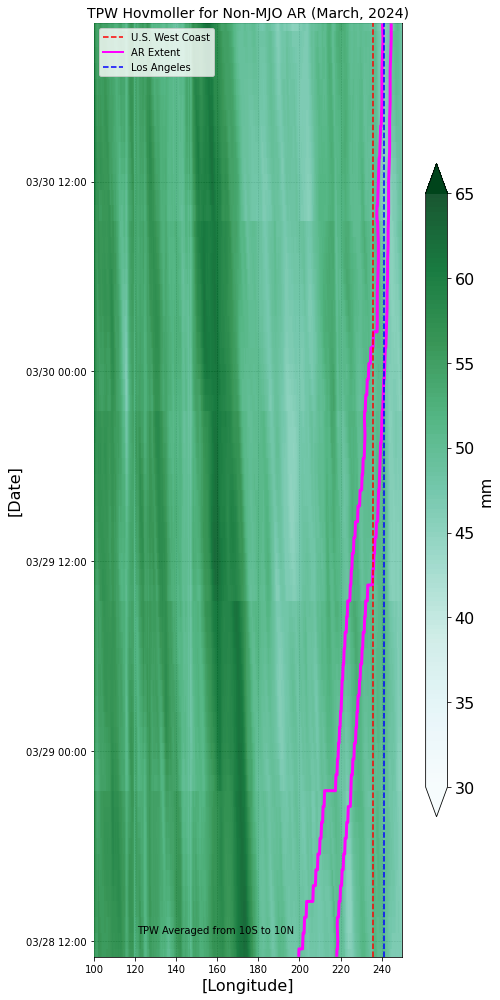

In [32]:
#try plotting again
#plot test
from scipy.ndimage import gaussian_filter
cm = 180

colormap = cmaps.MPL_BuGn
fig, ax = plt.subplots(figsize=[7, 14])

ax.set_title('TPW Hovmoller for Non-MJO AR (March, 2024)', fontsize=14, zorder=26)					   


css=ax.pcolormesh(tpw_plot_mean['longitude'].values, tpw_plot_mean['time'].values, tpw_plot_mean, cmap = colormap, zorder=21, vmin=30,vmax=65, alpha=.9)
ax.contour(mask_lon, mask_time, hovmoller_mask, [0.5], colors=('magenta',),zorder=23, linewidths=3)


x_val1 = 235.606
x_val2 = 241.34

# Add vertical lines
west_bound=ax.axvline(x=x_val1, color='red', linestyle='--', linewidth=1.5, label='U.S. West Coast', zorder=26)
LA_bound=ax.axvline(x=x_val2, color='blue', linestyle='--', linewidth=1.5, label='Los Angeles', zorder=26)

# Create a proxy artist for the legend
ar_css = mlines.Line2D([], [], color='magenta', linewidth=2, label='AR Extent')

cbar = plt.colorbar(css, ax=ax,orientation='vertical',aspect=30, shrink=0.7, pad=0.06, extend='both')
cbar.ax.tick_params(labelsize=16)
cbar.set_label('mm', fontsize =16)
ax.set_xlabel('[Longitude]', fontsize=16)
ax.set_ylabel('[Date]', fontsize=16)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='k', zorder=30)

# Format y-axis (time axis) for every 6 hours
ax.yaxis.set_major_locator(mdates.HourLocator(interval=12))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
ax.set_xlim(100, 250)

legend=plt.legend(handles=[west_bound,ar_css,LA_bound], loc='upper left')
legend.set_zorder(26)

plt.figtext(0.28, .07, 'TPW Averaged from 10S to 10N', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/Non_MJO_Case_Trop_Hov.png", dpi=350, bbox_inches='tight')
plt.tight_layout()
fig.show()

<ipython-input-84-002d1793bedf>:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


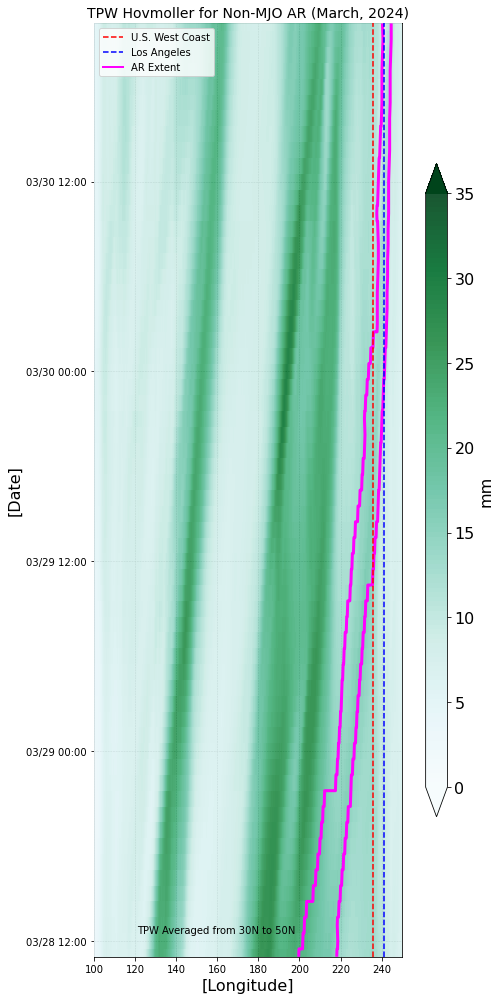

In [84]:
#try plotting again
#plot test
from scipy.ndimage import gaussian_filter
cm = 180

colormap = cmaps.MPL_BuGn
fig, ax = plt.subplots(figsize=[7, 14])


ax.set_title('TPW Hovmoller for Non-MJO AR (March, 2024)', fontsize=14, zorder=26)					   

css=ax.pcolormesh(tpw_plot_mean_mid['longitude'].values, tpw_plot_mean_mid['time'].values, tpw_plot_mean_mid, cmap = colormap, zorder=21, vmin=0,vmax=35, alpha=.9)

ax.contour(mask_lon, mask_time, hovmoller_mask, [0.5], colors=('magenta',),zorder=23, linewidths=3)


x_val1 = 235.606
x_val2 = 241.34

# Add vertical lines
west_bound=ax.axvline(x=x_val1, color='red', linestyle='--', linewidth=1.5, label='U.S. West Coast', zorder=26)
LA_bound=ax.axvline(x=x_val2, color='blue', linestyle='--', linewidth=1.5, label='Los Angeles', zorder=26)

# Create a proxy artist for the legend
ar_css = mlines.Line2D([], [], color='magenta', linewidth=2, label='AR Extent')



cbar = plt.colorbar(css, ax=ax,orientation='vertical',aspect=30, shrink=0.7, pad=0.06, extend='both')
cbar.ax.tick_params(labelsize=16)
cbar.set_label('mm', fontsize =16)
ax.set_xlabel('[Longitude]', fontsize=16)
ax.set_ylabel('[Date]', fontsize=16)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='k', zorder=30)

# Format y-axis (time axis) for every 6 hours
ax.yaxis.set_major_locator(mdates.HourLocator(interval=12))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
ax.set_xlim(100, 250)


legend=plt.legend(handles=[west_bound,LA_bound,ar_css], loc='upper left')
legend.set_zorder(26)

plt.figtext(0.28, .07, 'TPW Averaged from 30N to 50N', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/Non_MJO_Case_Mid_Hov.png", dpi=350, bbox_inches='tight')
plt.tight_layout()
fig.show()

### Moisture Hovmoller UPDATE

In [6]:
non_mjo_djfm['AR ID (string)'].iloc[0]

'/home/orca/bkerns/projects/mjo_lpt_and_ar/tracking/lpt-python-public/ar.testing7.merge_split/data/ar/g0_0h/thresh1/systems/2023060100_2024063023/lpt_system_mask_ar.lptid00510.2000.nc'

In [ ]:
xr.open_dataset('/home/orca/bkerns/projects/mjo_lpt_and_ar/tracking/lpt-python-public-2024/ar.testing7.merge_split/data/ar/g0_0h/thresh1/systems/2023060100_2024063023/lpt_system_mask_ar.lptid00510.2000.nc')

In [7]:
ary_test = xr.open_dataset('/home/orca/bkerns/projects/mjo_lpt_and_ar/tracking/lpt-python-public-2024/ar.testing7.merge_split/data/ar/g0_0h/thresh1/systems/2023060100_2024063023/lpt_system_mask_ar.lptid00510.2000.nc')
mask_ary = ary_test['mask']

mask_lon = mask_ary['lon']
mask_lat = mask_ary['lat']

In [8]:
ary_test

<xarray.Dataset>
Dimensions:                       (lat: 721, lon: 1440, time: 60, n: 1)
Coordinates:
  * n                             (n) int32 1
  * time                          (time) datetime64[ns] 2024-03-28T11:00:00 ....
  * lon                           (lon) float32 0.0 0.25 0.5 ... 359.5 359.8
  * lat                           (lat) float32 90.0 89.75 89.5 ... -89.75 -90.0
Data variables: (12/21)
    grid_area                     (lat, lon) float32 ...
    centroid_lon                  (time) float64 ...
    centroid_lat                  (time) float64 ...
    area                          (time) float64 ...
    largest_object_centroid_lon   (time) float64 ...
    largest_object_centroid_lat   (time) float64 ...
    ...                            ...
    lptid                         (n) float64 ...
    duration                      (n) float64 ...
    maxarea                       (n) float64 ...
    zonal_propagation_speed       (n) float64 ...
    meridional_propagation_speed  (n) float64 ...
    mask                          (time, lat, lon) int8 ...

In [10]:
tpw_stack = []

for xxxxxxx in range(0,len(ary_test['time'])):



    dt1 = pd.to_datetime(ary_test['time'].values[xxxxxxx])
    moi = str(dt1.month).rjust(2, '0')
    doi = str(dt1.day).rjust(2, '0')
    hoi = str(dt1.hour).rjust(2, '0')
    yoi = str(dt1.year)

    ldom = str(calendar.monthrange(dt1.year, dt1.month)[1]) #last day of month

    mask_ary = ary_test['mask'][xxxxxxx]
    mask_lon = ary_test['lon']
    mask_lat = ary_test['lat']




    #bring in mjo data
    fin_time = dt1
    year = dt1.year


    #bring in TPW data
    max_lat =10
    min_lat=-10
    min_lon=100 #-113.75
    max_lon=250 #-125.5

    tpw_test = xr.open_dataset('/home/orca/data/model_anal/era5/from_rda/tcwv/e5.oper.an.sfc.128_137_tcwv.ll025sc.'+yoi+moi+'0100_'+yoi+moi+ldom+'23.nc')

    LatIndexer, LonIndexer, TimeIndexer  = 'latitude', 'longitude', 'time'
    tpw_slice = tpw_test.sel(**{LatIndexer: slice(max_lat, min_lat),
                                LonIndexer: slice(min_lon, max_lon),
                    TimeIndexer: slice(dt1,dt1)})
    tpw_ary = tpw_slice['TCWV']

    tpw_stack += [tpw_ary]



In [9]:
## TPW for midlatitudes!!!
tpw_stack_mid = []

for xxxxxxx in range(0,len(ary_test['time'])):



    dt1 = pd.to_datetime(ary_test['time'].values[xxxxxxx])
    moi = str(dt1.month).rjust(2, '0')
    doi = str(dt1.day).rjust(2, '0')
    hoi = str(dt1.hour).rjust(2, '0')
    yoi = str(dt1.year)

    ldom = str(calendar.monthrange(dt1.year, dt1.month)[1]) #last day of month

    mask_ary = ary_test['mask'][xxxxxxx]
    mask_lon = ary_test['lon']
    mask_lat = ary_test['lat']





    fin_time = dt1
    year = dt1.year



    #bring in TPW data
    max_lat =30
    min_lat=10
    min_lon=100 #-113.75
    max_lon=250 #-125.5

    tpw_test = xr.open_dataset('/home/orca/data/model_anal/era5/from_rda/tcwv/e5.oper.an.sfc.128_137_tcwv.ll025sc.'+yoi+moi+'0100_'+yoi+moi+ldom+'23.nc')

    LatIndexer, LonIndexer, TimeIndexer  = 'latitude', 'longitude', 'time'
    tpw_slice = tpw_test.sel(**{LatIndexer: slice(max_lat, min_lat),
                                LonIndexer: slice(min_lon, max_lon),
                    TimeIndexer: slice(dt1,dt1)})
    tpw_ary = tpw_slice['TCWV']

    tpw_stack_mid += [tpw_ary]




In [11]:
tpw_array = xr.concat(tpw_stack, dim="time")
# mjo_array = xr.concat(mjo_lpt_stack, dim="time")
tpw_plot_mean = tpw_array.mean(dim='latitude')
mask_ary=ary_test['mask']

mask_lon=mask_ary['lon']
mask_time = mask_ary['time']

tpw_array_mid = xr.concat(tpw_stack_mid, dim="time")
# I need to average the above array such that I have the time, longitude, and the mean latitudinal tpw along each lon

tpw_plot_mean_mid = tpw_array_mid.mean(dim='latitude')

In [12]:
# Assuming your 3D DataArray is called `mask_ary` with dims ('time', 'lat', 'lon')
hovmoller_mask = (mask_ary == 1).any(dim='lat')
hovmoller_mask = hovmoller_mask.astype(int)

<ipython-input-21-b1446d54ed4b>:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


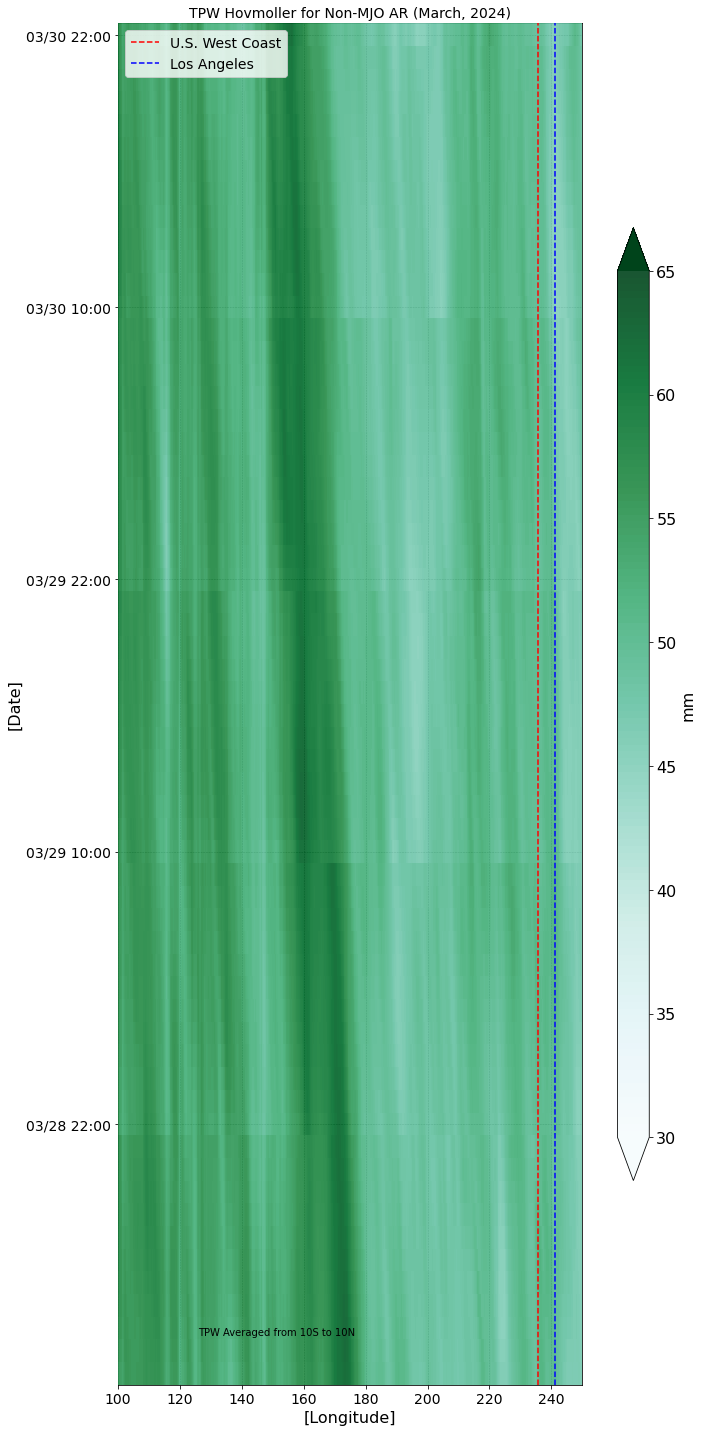

In [21]:
#try plotting again
#plot test
from scipy.ndimage import gaussian_filter
cm = 180

colormap = cmaps.MPL_BuGn
fig, ax = plt.subplots(figsize=[10, 20])

ax.set_title('TPW Hovmoller for Non-MJO AR (March, 2024)', fontsize=14, zorder=26)					   


css=ax.pcolormesh(tpw_plot_mean['longitude'].values, tpw_plot_mean['time'].values, tpw_plot_mean, cmap = colormap, zorder=21, vmin=30,vmax=65, alpha=.9)
# ax.contour(mask_lon, mask_time, hovmoller_mask, [0.5], colors=('magenta',),zorder=23, linewidths=3)


x_val1 = 235.606
x_val2 = 241.34

# Add vertical lines
west_bound=ax.axvline(x=x_val1, color='red', linestyle='--', linewidth=1.5, label='U.S. West Coast', zorder=26)
LA_bound=ax.axvline(x=x_val2, color='blue', linestyle='--', linewidth=1.5, label='Los Angeles', zorder=26)

# Create a proxy artist for the legend
# ar_css = mlines.Line2D([], [], color='magenta', linewidth=2, label='AR Extent')

cbar = plt.colorbar(css, ax=ax,orientation='vertical',aspect=30, shrink=0.7, pad=0.06, extend='both')
cbar.ax.tick_params(labelsize=16)
cbar.set_label('mm', fontsize =16)
ax.set_xlabel('[Longitude]', fontsize=16)
ax.set_ylabel('[Date]', fontsize=16)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='k', zorder=30)

# Format y-axis (time axis) for every 6 hours
ax.yaxis.set_major_locator(mdates.HourLocator(interval=12))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
ax.set_xlim(100, 250)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# legend=plt.legend(handles=[west_bound,ar_css,LA_bound], loc='upper left')
legend=plt.legend(handles=[west_bound,LA_bound], loc='upper left',fontsize=14)
legend.set_zorder(26)

plt.figtext(0.28, .07, 'TPW Averaged from 10S to 10N', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/Non_MJO_Case_Trop_Hov_NEW_2025_07_18.png", dpi=350, bbox_inches='tight')
plt.tight_layout()
fig.show()

In [15]:
tpw_plot_mean_mid.max()

<xarray.DataArray 'TCWV' ()>
array(47.059967, dtype=float32)

<ipython-input-20-59e03c5d5bb7>:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


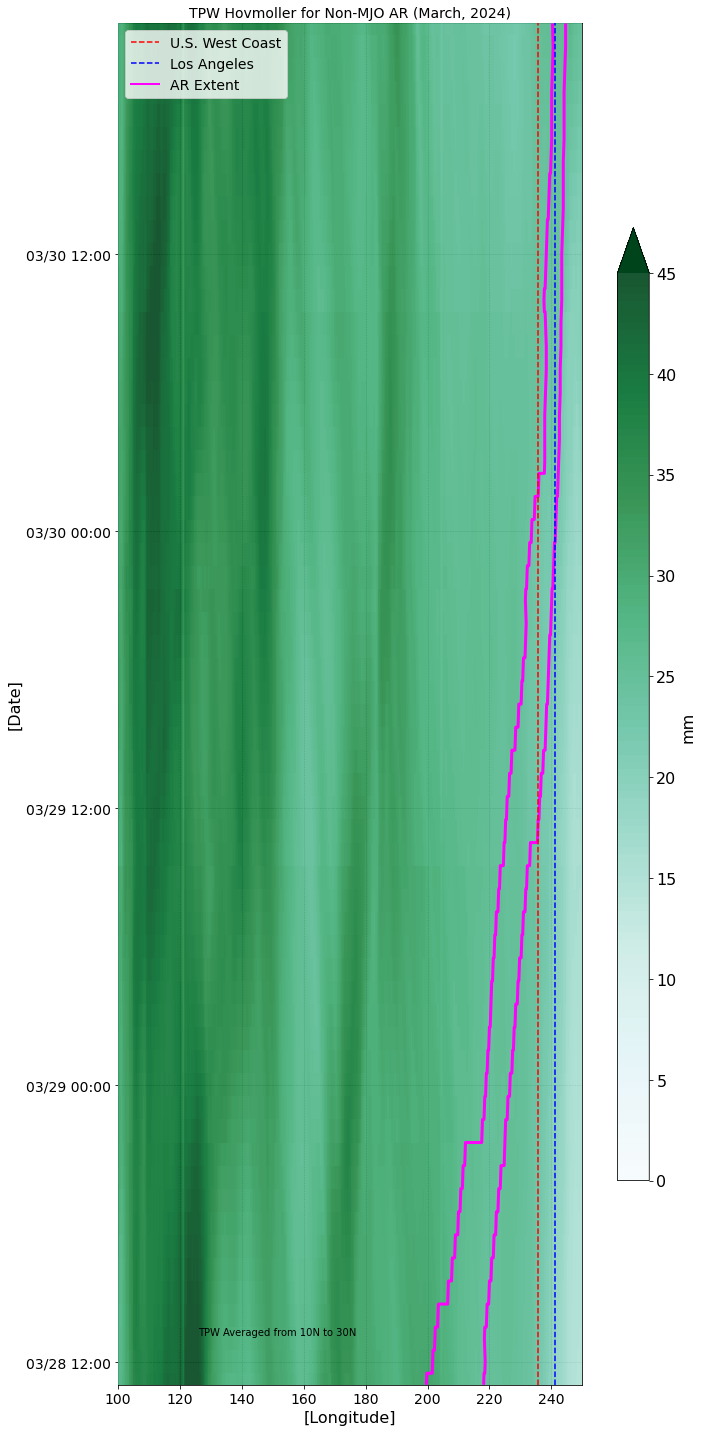

In [20]:
#try plotting again
#plot test
from scipy.ndimage import gaussian_filter
cm = 180

colormap = cmaps.MPL_BuGn
fig, ax = plt.subplots(figsize=[10, 20])


ax.set_title('TPW Hovmoller for Non-MJO AR (March, 2024)', fontsize=14, zorder=26)					   

css=ax.pcolormesh(tpw_plot_mean_mid['longitude'].values, tpw_plot_mean_mid['time'].values, tpw_plot_mean_mid, cmap = colormap, zorder=21, vmin=0,vmax=45, alpha=.9)

ax.contour(mask_lon, mask_time, hovmoller_mask, [0.5], colors=('magenta',),zorder=23, linewidths=3)


x_val1 = 235.606
x_val2 = 241.34

# Add vertical lines
west_bound=ax.axvline(x=x_val1, color='red', linestyle='--', linewidth=1.5, label='U.S. West Coast', zorder=26)
LA_bound=ax.axvline(x=x_val2, color='blue', linestyle='--', linewidth=1.5, label='Los Angeles', zorder=26)

# Create a proxy artist for the legend
ar_css = mlines.Line2D([], [], color='magenta', linewidth=2, label='AR Extent')



cbar = plt.colorbar(css, ax=ax,orientation='vertical',aspect=30, shrink=0.7, pad=0.06, extend='max')
cbar.ax.tick_params(labelsize=16)
cbar.set_label('mm', fontsize =16)
ax.set_xlabel('[Longitude]', fontsize=16)
ax.set_ylabel('[Date]', fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='k', zorder=30)

# Format y-axis (time axis) for every 6 hours
ax.yaxis.set_major_locator(mdates.HourLocator(interval=12))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
ax.set_xlim(100, 250)


legend=plt.legend(handles=[west_bound,LA_bound,ar_css], loc='upper left',fontsize=14)
legend.set_zorder(26)

plt.figtext(0.28, .07, 'TPW Averaged from 10N to 30N', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/Non_MJO_Case_Mid_Hov_NEW_2025_07_18.png", dpi=350, bbox_inches='tight')
plt.tight_layout()
fig.show()

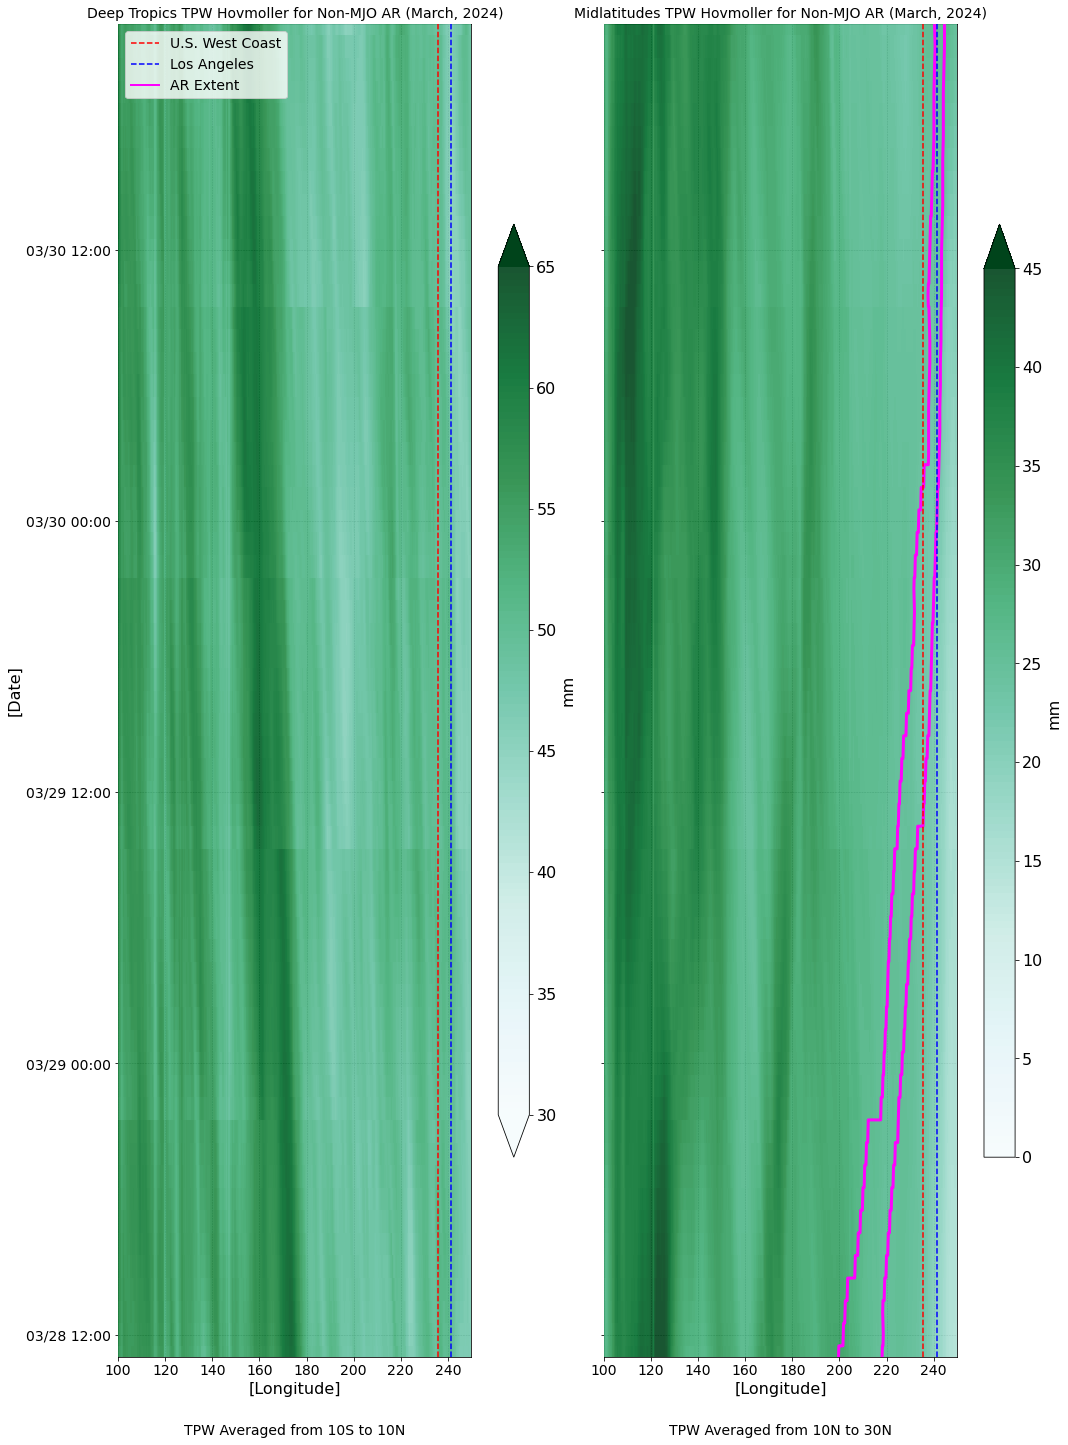

In [35]:


fig, axes = plt.subplots(1, 2, figsize=(15, 20), sharey=True)

# Define colorbar limits
vmin1, vmax1 = 30, 65  # for first subplot (extend both)
vmin2, vmax2 = 0, 45   # for second subplot (extend max)

# Dataset format: 2-tuple (no mask) or 5-tuple (with mask)
datasets = [
    (tpw_plot_mean, 'Deep Tropics TPW Hovmoller for Non-MJO AR (March, 2024)'),
    (tpw_plot_mean_mid, 'Midlatitudes TPW Hovmoller for Non-MJO AR (March, 2024)', hovmoller_mask, mask_lon, mask_time)
]

annotations = ['TPW Averaged from 10S to 10N', 'TPW Averaged from 10N to 30N']
colorbar_limits = [(vmin1, vmax1), (vmin2, vmax2)]
colorbar_extends = ['both', 'max']  # new line for extension direction

legend_handles = []

for idx, (ax, data, annotation, (vmin, vmax), extend_dir) in enumerate(zip(axes, datasets, annotations, colorbar_limits, colorbar_extends)):
    tpw_data = data[0]
    title = data[1]
    has_mask = len(data) == 5

    colormap = cmaps.MPL_BuGn

    ax.set_title(title, fontsize=14, zorder=26)

    css = ax.pcolormesh(
        tpw_data['longitude'].values,
        tpw_data['time'].values,
        tpw_data,
        cmap=colormap,
        zorder=21,
        vmin=vmin, vmax=vmax,
        alpha=0.9
    )

    ar_css = None
    if has_mask:
        hov_mask, mask_lon, mask_time = data[2], data[3], data[4]
        ax.contour(mask_lon, mask_time, hov_mask, [0.5], colors='magenta', zorder=23, linewidths=3)
        ar_css = mlines.Line2D([], [], color='magenta', linewidth=2, label='AR Extent')

    # Vertical lines
    x_val1 = 235.606
    x_val2 = 241.34
    west_bound = ax.axvline(x=x_val1, color='red', linestyle='--', linewidth=1.5, label='U.S. West Coast', zorder=26)
    LA_bound = ax.axvline(x=x_val2, color='blue', linestyle='--', linewidth=1.5, label='Los Angeles', zorder=26)

    if idx == 1:
        # Save legend handles once
        legend_handles = [west_bound, LA_bound]
        if ar_css:
            legend_handles.append(ar_css)

    # Colorbar with customized extend direction
    cbar = plt.colorbar(css, ax=ax, orientation='vertical', aspect=30, shrink=0.7, pad=0.06, extend=extend_dir)
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label('mm', fontsize=16)

    ax.set_xlabel('[Longitude]', fontsize=16)
    if idx == 0:
        ax.set_ylabel('[Date]', fontsize=16)

    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='k', zorder=30)

    ax.yaxis.set_major_locator(mdates.HourLocator(interval=12))
    ax.yaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
    ax.set_xlim(100, 250)
    ax.tick_params(labelsize=14)

    # Annotation below each subplot
    ax.text(0.5, -0.05, annotation, fontsize=14, ha='center', va='top', transform=ax.transAxes)

# Shared legend in upper right of second subplot
legend = axes[0].legend(handles=legend_handles, loc='upper left', fontsize=14, frameon=True)
legend.set_zorder(30)

plt.tight_layout()
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/Non_MJO_Case_Combined_Hov_NEW_2025_07_18.png", dpi=350, bbox_inches='tight')
plt.show()


## MJO-Active

### AR/MJO Lifecycle

In [4]:
mjo_act_djfm

AR ID (string)    Landfall Datetime  \
0    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2010-12-14T03:00:00   
1    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2017-01-07T09:00:00   
2    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2005-01-08T17:00:00   
3    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2017-02-05T13:00:00   
4    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2023-01-06T17:00:00   
..                                                 ...                  ...   
310  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2008-03-03T11:00:00   
311  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2007-03-31T02:00:00   
312  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2006-02-11T10:00:00   
313  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2006-12-29T16:00:00   
314  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2006-02-12T21:00:00   

      Max ERM    Max IVT  End Season Year  Month  AR ID (Number)  
0    5.356253  1228.1925             2010   12.0          314.40  
1    5.235799  1184.5072             2016    1.0          446.10  
2    4.520205   866.1238             2004    1.0          404.50  
3    4.502615  1634.8346             2016    2.0          486.10  
4    4.250397  1748.2942             2022    1.0          419.20  
..        ...        ...              ...    ...             ...  
310  0.398473  1468.8276             2007    3.0          509.30  
311  0.318897  1124.7683             2006    3.0          500.30  
312  0.296706  1464.0636             2005    2.0          507.10  
313  0.273069  1616.2050             2006   12.0          287.22  
314  0.257451  1191.5931             2005    2.0          512.10  

[315 rows x 7 columns]

In [5]:
ary_test = xr.open_dataset(mjo_act_djfm['AR ID (string)'].iloc[2])
mask_ary = ary_test['mask']

mask_lon = mask_ary['lon']
mask_lat = mask_ary['lat']

In [16]:
#create title string

start_year = str(mask_ary['time'][0].dt.year.values)
start_month = str(mask_ary['time'][0].dt.month.values)
start_day = str(mask_ary['time'][0].dt.day.values)
start_hour = str(mask_ary['time'][0].dt.hour.values)

start_dt_str = start_year+'-'+start_month+'-'+start_day+'-'+start_hour+':00'

end_year = str(mask_ary['time'][-1].dt.year.values)
end_month = str(mask_ary['time'][-1].dt.month.values)
end_day = str(mask_ary['time'][-1].dt.day.values)
end_hour = str(mask_ary['time'][-1].dt.hour.values)

end_dt_str = end_year+'-'+end_month+'-'+end_day+'-'+end_hour+':00'

In [20]:
#create list of times that start 5 days before AR onset

start_time = dt.datetime(2005, 1, 2, 5, 0)
end_time = dt.datetime(2005, 1, 10, 15, 0)
# end_time = dt.datetime(2024, 4, 30, 18, 0)

# Define the time delta of 6 hours
time_delta = timedelta(hours=1) #use 24 hours to grab all of the appropriate arrays

# Generate the list of datetimes
datetime_list = []

current_datetime = start_time
while current_datetime <= end_time:
    datetime_list.append(current_datetime)
    current_datetime += time_delta

In [22]:
#create a an array that just contains the MJO LPT mask data
# for the MJO data, let's add MJO development for an extra 5 days prior to the AR start time
TimeIndexer = 'time'
mjo_bulk_hold = []

for jj in range(2,3):
    #get title of AR ID string
    NNNN=18
    t_len = len(str(mjo_act_djfm['AR ID (string)'].iloc[jj]))
    lpt_id_tit=str(mjo_act_djfm['AR ID (string)'].iloc[jj])[t_len - NNNN:]

    #get the string for the MJO lpt times
    MMMMMM = 59
    nn_len = 0
    year_str=str(mjo_act_djfm['AR ID (string)'].iloc[jj])[nn_len - MMMMMM:-38]

    #open up mjo data
    mjo_test = xr.open_dataset('/home/orca/bkerns/lib/lpt/lpt-python-public/ERA5/data/era5/g20_72h/thresh12/systems/lpt_composite_mask_'+year_str+'_mjo_lpt.nc')
    mjo_mask=mjo_test['mask_with_filter_and_accumulation'] #pull this out the loop

    ar_test = xr.open_dataset(mjo_act_djfm['AR ID (string)'].iloc[jj])

    for j in datetime_list:
        fin_time = j

        mjo_slice = mjo_mask.sel(**{TimeIndexer: slice(fin_time, fin_time)})

        mjo_bulk_hold += [mjo_slice]

mjo_array = xr.concat(mjo_bulk_hold, dim='time')

In [23]:
mjo_array

<xarray.DataArray 'mask_with_filter_and_accumulation' (time: 203, lat: 721,
                                                       lon: 1440)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=int8)
Coordinates:
  * time     (time) datetime64[ns] 2005-01-02T05:00:00 ... 2005-01-10T15:00:00
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Attributes:
    units:    1

In [24]:
mjo_lon = mjo_array['lon']
mjo_lat = mjo_array['lat']
mask_ary = ary_test['mask']
mask_lon = mask_ary['lon']
mask_lat = mask_ary['lat']

/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0

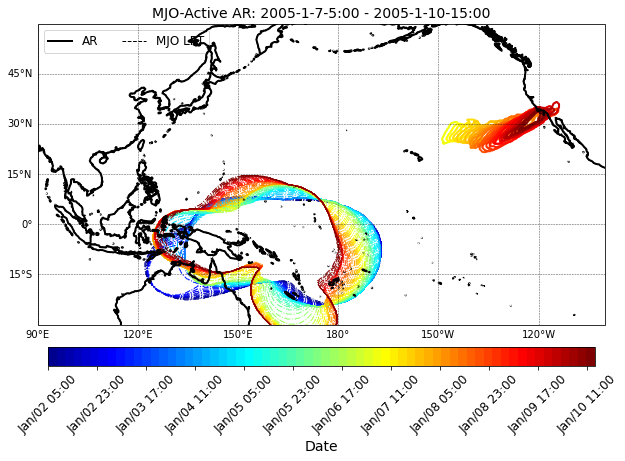

In [65]:
#plotting the MJO and AR Together
from scipy.ndimage import gaussian_filter
cm = 180


# Full MJO timeline (used for colorbar and plotting)
mjo_time = pd.to_datetime(mjo_array['time'].values)
ar_time = pd.to_datetime(mask_ary['time'].values)

# Define plotting time indices
step = 3
mjo_indices = np.arange(0, len(mjo_time), step)
selected_times = mjo_time[mjo_indices]


# Define colormap
cmap = cmaps.matlab_jet
norm = Normalize(vmin=mdates.date2num(selected_times[0]), vmax=mdates.date2num(selected_times[-1]))

# Create time → index mappings
ar_time_index = {t: i for i, t in enumerate(ar_time)}
mjo_time_index = {t: i for i, t in enumerate(mjo_time)}

# Keep a list of contour handles to create a colorbar later
contour_handles = []

fig = plt.figure(figsize=[14, 7])
political_boundaries = NaturalEarthFeature(category='cultural', name='admin_0_boundary_lines_land', scale='50m', facecolor='none')
states = NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=cm))


ax.set_title('MJO-Active AR: '+start_dt_str+' - '+end_dt_str, fontsize=14, zorder = 26)					   
ax.add_feature(cartopy.feature.LAND, edgecolor='k', facecolor='none', zorder=24)
ax.coastlines('50m', linewidth=2, zorder=24)

minlon = 80 + cm
maxlon = -90 + cm

ax.set_extent([minlon, maxlon, -30, 60], ccrs.PlateCarree())

# Plot MJO contours for every time step
for i, t in enumerate(selected_times):
    mjo_idx = mjo_time_index[t]
    color = cmap(norm(mdates.date2num(t)))
    
    if np.any(mjo_array[mjo_idx]):
        ax.contour(
            mjo_lon, mjo_lat, mjo_array[mjo_idx], levels=[0.5],
            colors=[color], linewidths=1, transform=ccrs.PlateCarree(),
            linestyles='dashdot', zorder=13 + i * 0.01
        )

# Plot AR contours only where AR time overlaps with MJO time
for i, t in enumerate(selected_times):
    if t in ar_time_index:
        ar_idx = ar_time_index[t]
        color = cmap(norm(mdates.date2num(t)))
        
        if np.any(mask_ary[ar_idx]):
            ax.contour(
                mask_lon, mask_lat, mask_ary[ar_idx], levels=[0.5],
                colors=[color], linewidths=2, transform=ccrs.PlateCarree(),
                zorder=12 + i * 0.01
            )

        
# Create colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', aspect=30, shrink=0.7, pad=0.06)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Date', fontsize=14)

# Format ticks: Month/Day Hour:Min
num_ticks = 10  # adjust for spacing
tick_times = selected_times[::max(len(selected_times)//num_ticks, 1)]
tick_nums = mdates.date2num(tick_times)
tick_labels = [pd.to_datetime(t).strftime('%b/%d %H:%M') for t in tick_times]

cbar.set_ticks(tick_nums)
cbar.set_ticklabels(tick_labels, rotation=45)



#try adding gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                linewidth=0.5, color='k', alpha=0.7, linestyle='--', zorder=25)

gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 90, 15))

# Create custom legend handles
dashed_line = Line2D([0], [0], color='black', linewidth=1, linestyle='dashed', label='MJO LPT')
solid_line = Line2D([0], [0], color='black', linewidth=2, linestyle='-', label='AR')

# Add legend to the top center of the plot
ax.legend(handles=[solid_line, dashed_line], loc='upper left', fontsize=12, frameon=True, ncol=2)
# plt.legend()
# plt.clabel(cdssss, inline = True,
#            fontsize=13, fmt='%1.2f', colors = 'gray', zorder = 26)
# ax.text(0.9, 0.05, "IVT: every 50 kg/m/s starting at 150 kg/m/s.", ha='right', color='gray', fontweight='bold', transform=ax.transAxes, zorder=26)
# plt.figtext(0.28, .07, 'Composite of IVT from June 2000 through June 2004', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/MJO_Act_Lifecycle_Map.png", dpi=350, bbox_inches='tight')
fig.show()

/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0

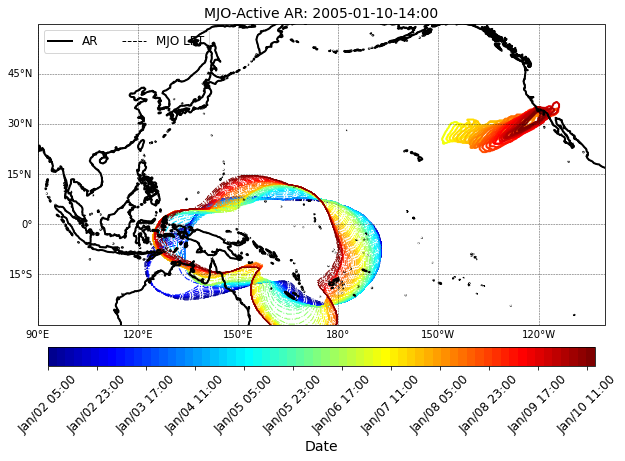

In [27]:
# Set up figure and map only once

from scipy.ndimage import gaussian_filter
cm = 180

# Full MJO timeline (used for colorbar and plotting)
mjo_time = pd.to_datetime(mjo_array['time'].values)
ar_time = pd.to_datetime(mask_ary['time'].values)

# Define plotting time indices
step = 3
mjo_indices = np.arange(0, len(mjo_time), step)
selected_times = mjo_time[mjo_indices]


# Create time → index mappings
ar_time_index = {t: i for i, t in enumerate(ar_time)}
mjo_time_index = {t: i for i, t in enumerate(mjo_time)}

fig = plt.figure(figsize=[14, 7])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=cm))

# Add map features
ax.add_feature(cartopy.feature.LAND, edgecolor='k', facecolor='none', zorder=24)
ax.coastlines('50m', linewidth=2, zorder=24)
ax.set_extent([80 + cm, -90 + cm, -30, 60], ccrs.PlateCarree())

# Gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='k', alpha=0.7, linestyle='--', zorder=25)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 90, 15))

# Legend
solid_line = Line2D([0], [0], color='black', linewidth=2, linestyle='-', label='AR')
dashed_line = Line2D([0], [0], color='black', linewidth=1, linestyle='dashed', label='MJO LPT')
ax.legend(handles=[solid_line, dashed_line], loc='upper left', fontsize=12, frameon=True, ncol=2)

# Setup colorbar
cmap = cmaps.matlab_jet
norm = Normalize(vmin=mdates.date2num(selected_times[0]), vmax=mdates.date2num(selected_times[-1]))
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', aspect=30, shrink=0.7, pad=0.06)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Date', fontsize=14)

# Format ticks
num_ticks = 10
tick_times = selected_times[::max(len(selected_times)//num_ticks, 1)]
tick_nums = mdates.date2num(tick_times)
tick_labels = [pd.to_datetime(t).strftime('%b/%d %H:%M') for t in tick_times]
cbar.set_ticks(tick_nums)
cbar.set_ticklabels(tick_labels, rotation=45)

# Cumulative contour plotting
for i, t in enumerate(selected_times):
    color = cmap(norm(mdates.date2num(t)))
    
    # Plot MJO contour
    if t in mjo_time_index:
        mjo_idx = mjo_time_index[t]
        if np.any(mjo_array[mjo_idx]):
            ax.contour(
                mjo_lon, mjo_lat, mjo_array[mjo_idx], levels=[0.5],
                colors=[color], linewidths=1, transform=ccrs.PlateCarree(),
                linestyles='dashdot', zorder=13 + i * 0.01
            )

    # Plot AR contour
    if t in ar_time_index:
        ar_idx = ar_time_index[t]
        if np.any(mask_ary[ar_idx]):
            ax.contour(
                mask_lon, mask_lat, mask_ary[ar_idx], levels=[0.5],
                colors=[color], linewidths=2, transform=ccrs.PlateCarree(),
                zorder=12 + i * 0.01
            )
    
    # Save frame
    dt_str = pd.to_datetime(t).strftime('%Y-%m-%d-%H:%M')
    ax.set_title('MJO-Active AR: '+dt_str, fontsize=14, zorder = 26)

    # Save frame with cumulative contours
    fig.savefig(f'/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/anim/MJO_Act/AR_{dt_str}.png',
                dpi=350, bbox_inches='tight')


### Moisture Hovmoller

In [66]:
tpw_stack = []

for xxxxxxx in range(0,len(ary_test['time'])):



    dt1 = pd.to_datetime(ary_test['time'].values[xxxxxxx])
    moi = str(dt1.month).rjust(2, '0')
    doi = str(dt1.day).rjust(2, '0')
    hoi = str(dt1.hour).rjust(2, '0')
    yoi = str(dt1.year)

    ldom = str(calendar.monthrange(dt1.year, dt1.month)[1]) #last day of month

    mask_ary = ary_test['mask'][xxxxxxx]
    mask_lon = ary_test['lon']
    mask_lat = ary_test['lat']




    #bring in mjo data
    fin_time = dt1
    year = dt1.year


    #bring in TPW data
    max_lat =10
    min_lat=-10
    min_lon=100 #-113.75
    max_lon=250 #-125.5

    tpw_test = xr.open_dataset('/home/orca/data/model_anal/era5/from_rda/tcwv/e5.oper.an.sfc.128_137_tcwv.ll025sc.'+yoi+moi+'0100_'+yoi+moi+ldom+'23.nc')

    LatIndexer, LonIndexer, TimeIndexer  = 'latitude', 'longitude', 'time'
    tpw_slice = tpw_test.sel(**{LatIndexer: slice(max_lat, min_lat),
                                LonIndexer: slice(min_lon, max_lon),
                    TimeIndexer: slice(dt1,dt1)})
    tpw_ary = tpw_slice['TCWV']

    tpw_stack += [tpw_ary]



In [67]:
## TPW for midlatitudes!!!
tpw_stack_mid = []

for xxxxxxx in range(0,len(ary_test['time'])):
# for xxxxxxx in range(0,43,3):
# for xxxxxxx in range(0,1):
# for xxxxxxx in ar_dates_to_plot[0:1]:


    dt1 = pd.to_datetime(ary_test['time'].values[xxxxxxx])
    moi = str(dt1.month).rjust(2, '0')
    doi = str(dt1.day).rjust(2, '0')
    hoi = str(dt1.hour).rjust(2, '0')
    yoi = str(dt1.year)

    ldom = str(calendar.monthrange(dt1.year, dt1.month)[1]) #last day of month

    mask_ary = ary_test['mask'][xxxxxxx]
    mask_lon = ary_test['lon']
    mask_lat = ary_test['lat']




    #bring in mjo data
    fin_time = dt1
    year = dt1.year



    #bring in TPW data
    max_lat =50
    min_lat=30
    min_lon=100 #-113.75
    max_lon=250 #-125.5

    tpw_test = xr.open_dataset('/home/orca/data/model_anal/era5/from_rda/tcwv/e5.oper.an.sfc.128_137_tcwv.ll025sc.'+yoi+moi+'0100_'+yoi+moi+ldom+'23.nc')

    LatIndexer, LonIndexer, TimeIndexer  = 'latitude', 'longitude', 'time'
    tpw_slice = tpw_test.sel(**{LatIndexer: slice(max_lat, min_lat),
                                LonIndexer: slice(min_lon, max_lon),
                    TimeIndexer: slice(dt1,dt1)})
    tpw_ary = tpw_slice['TCWV']

    tpw_stack_mid += [tpw_ary]




In [68]:
mjo_lpt_stack = []

for xxxxxxx in range(2,3):
    
  NNNN=18
  t_len = len(str(mjo_act_djfm['AR ID (string)'].iloc[xxxxxxx]))
  lpt_id_tit=str(mjo_act_djfm['AR ID (string)'].iloc[xxxxxxx])[t_len - NNNN:]

  #get the string for the MJO lpt times
  MMMMMM = 59
  nn_len = 0
  year_str=str(mjo_act_djfm['AR ID (string)'].iloc[xxxxxxx])[nn_len - MMMMMM:-38]
 #open up mjo data
  mjo_test = xr.open_dataset('/home/orca/bkerns/lib/lpt/lpt-python-public/ERA5/data/era5/g20_72h/thresh12/systems/lpt_composite_mask_'+year_str+'_mjo_lpt.nc')
  mjo_mask=mjo_test['mask_with_filter_and_accumulation'] #pull this out the loop

  for llllll in range(0,len(ary_test['time'])):

    TimeIndexer = 'time'
    dt1 = pd.to_datetime(ary_test['time'].values[llllll])
    mjo_slice = mjo_mask.sel(**{TimeIndexer: slice(dt1, dt1)})

    mjo_lpt_stack += [mjo_slice]

In [69]:
tpw_array = xr.concat(tpw_stack, dim="time")
mjo_array = xr.concat(mjo_lpt_stack, dim="time")
tpw_plot_mean = tpw_array.mean(dim='latitude')
mask_ary=ary_test['mask']

mask_lon=mask_ary['lon']
mask_time = mask_ary['time']

tpw_array_mid = xr.concat(tpw_stack_mid, dim="time")
# I need to average the above array such that I have the time, longitude, and the mean latitudinal tpw along each lon

tpw_plot_mean_mid = tpw_array_mid.mean(dim='latitude')

In [71]:
# Assuming your 3D DataArray is called `mask_ary` with dims ('time', 'lat', 'lon')
hovmoller_mask = (mask_ary == 1).any(dim='lat')
hovmoller_mask = hovmoller_mask.astype(int)

#make MJO LPt hovmoller
hovmoller_mjo = (mjo_array == 1).any(dim='lat')
hovmoller_mjo = hovmoller_mjo.astype(int)

In [72]:
mjo_array

<xarray.DataArray 'mask_with_filter_and_accumulation' (time: 83, lat: 721,
                                                       lon: 1440)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=int8)
Coordinates:
  * time     (time) datetime64[ns] 2005-01-07T05:00:00 ... 2005-01-10T15:00:00
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Attributes:
    units:    1

<ipython-input-74-b366c5322ecc>:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


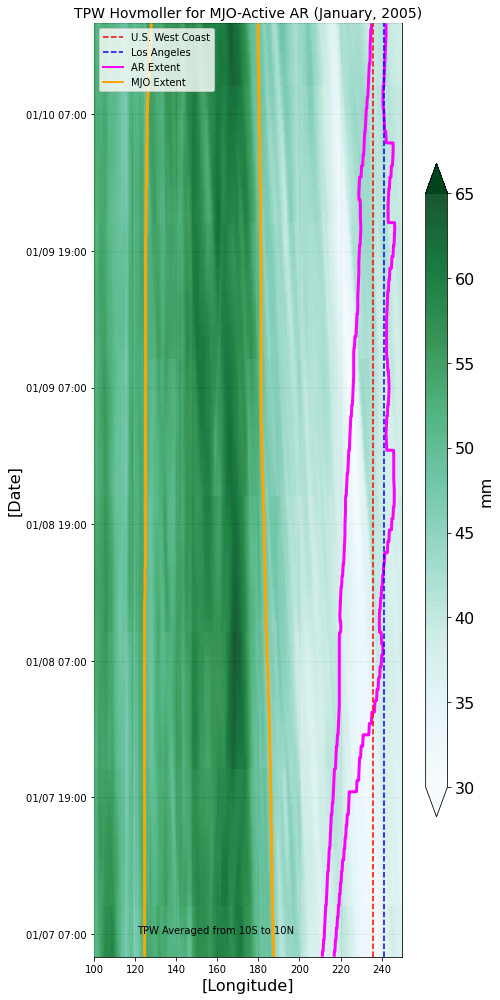

In [74]:
#try plotting again
#plot test
from scipy.ndimage import gaussian_filter
cm = 180

colormap = cmaps.MPL_BuGn
fig, ax = plt.subplots(figsize=[7, 14])


ax.set_title('TPW Hovmoller for MJO-Active AR (January, 2005)', fontsize=14, zorder=26)					   


css=ax.pcolormesh(tpw_plot_mean['longitude'].values, tpw_plot_mean['time'].values, tpw_plot_mean, cmap = colormap, zorder=21, vmin=30,vmax=65, alpha=.9)

ax.contour(mask_lon, mask_time, hovmoller_mask, [0.5], colors=('magenta',),zorder=23, linewidths=3)
ax.contour(hovmoller_mjo['lon'], hovmoller_mjo['time'], hovmoller_mjo, [0.5], colors=('orange',),zorder=23, linewidths=3)

x_val1 = 235.606
x_val2 = 241.34

# Add vertical lines
west_bound=ax.axvline(x=x_val1, color='red', linestyle='--', linewidth=1.5, label='U.S. West Coast', zorder=26)
LA_bound=ax.axvline(x=x_val2, color='blue', linestyle='--', linewidth=1.5, label='Los Angeles', zorder=26)

# Create a proxy artist for the legend
ar_css = mlines.Line2D([], [], color='magenta', linewidth=2, label='AR Extent')
mjo_css = mlines.Line2D([], [], color='orange', linewidth=2, label='MJO Extent')



cbar = plt.colorbar(css, ax=ax,orientation='vertical',aspect=30, shrink=0.7, pad=0.06, extend='both')
cbar.ax.tick_params(labelsize=16)
cbar.set_label('mm', fontsize =16)
ax.set_xlabel('[Longitude]', fontsize=16)
ax.set_ylabel('[Date]', fontsize=16)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='k', zorder=30)

# Format y-axis (time axis) for every 6 hours
ax.yaxis.set_major_locator(mdates.HourLocator(interval=12))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
ax.set_xlim(100, 250)



legend=plt.legend(handles=[west_bound,LA_bound,ar_css,mjo_css], loc='upper left')
legend.set_zorder(26)

plt.figtext(0.28, .07, 'TPW Averaged from 10S to 10N', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/MJO_Act_Case_Trop_Hov.png", dpi=350, bbox_inches='tight')
plt.tight_layout()
fig.show()

<ipython-input-77-ce665fca24bf>:52: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


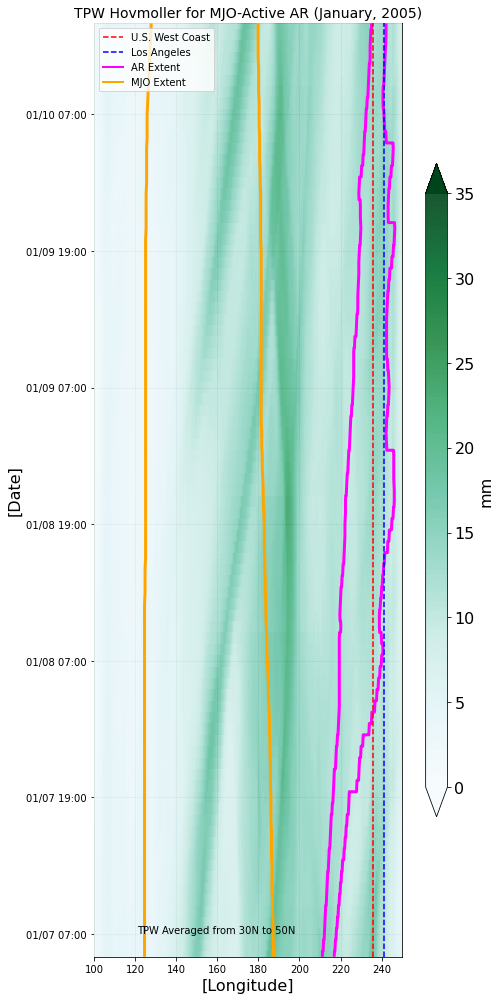

In [77]:
#try plotting again
#plot test
from scipy.ndimage import gaussian_filter
cm = 180

colormap = cmaps.MPL_BuGn
fig, ax = plt.subplots(figsize=[7, 14])


ax.set_title('TPW Hovmoller for MJO-Active AR (January, 2005)', fontsize=14, zorder=26)					   


css=ax.pcolormesh(tpw_plot_mean_mid['longitude'].values, tpw_plot_mean_mid['time'].values, tpw_plot_mean_mid, cmap = colormap, zorder=21, vmin=0,vmax=35, alpha=.9)

ax.contour(mask_lon, mask_time, hovmoller_mask, [0.5], colors=('magenta',),zorder=23, linewidths=3)
ax.contour(hovmoller_mjo['lon'], hovmoller_mjo['time'], hovmoller_mjo, [0.5], colors=('orange',),zorder=23, linewidths=3)

x_val1 = 235.606
x_val2 = 241.34

# Add vertical lines
west_bound=ax.axvline(x=x_val1, color='red', linestyle='--', linewidth=1.5, label='U.S. West Coast', zorder=26)
LA_bound=ax.axvline(x=x_val2, color='blue', linestyle='--', linewidth=1.5, label='Los Angeles', zorder=26)

# Create a proxy artist for the legend
ar_css = mlines.Line2D([], [], color='magenta', linewidth=2, label='AR Extent')
mjo_css = mlines.Line2D([], [], color='orange', linewidth=2, label='MJO Extent')



cbar = plt.colorbar(css, ax=ax,orientation='vertical',aspect=30, shrink=0.7, pad=0.06, extend='both')
cbar.ax.tick_params(labelsize=16)
cbar.set_label('mm', fontsize =16)
ax.set_xlabel('[Longitude]', fontsize=16)
ax.set_ylabel('[Date]', fontsize=16)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='k', zorder=30)

# Format y-axis (time axis) for every 6 hours
ax.yaxis.set_major_locator(mdates.HourLocator(interval=12))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
ax.set_xlim(100, 250)


legend=plt.legend(handles=[west_bound,LA_bound,ar_css,mjo_css], loc='upper left')
legend.set_zorder(26)

plt.figtext(0.28, .07, 'TPW Averaged from 30N to 50N', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/MJO_Act_Case_Mid_Hov.png", dpi=350, bbox_inches='tight')
plt.tight_layout()
fig.show()

### Moisture Hovmoller UPDATE

In [37]:
mjo_act_djfm['AR ID (string)'].iloc[2]

'/home/orca/bkerns/projects/mjo_lpt_and_ar/tracking/lpt-python-public/ar.testing7.merge_split/data/ar/g0_0h/thresh1/systems/2004060100_2005063023/lpt_system_mask_ar.lptid00404.5000.nc'

In [38]:
ary_test = xr.open_dataset('/home/orca/bkerns/projects/mjo_lpt_and_ar/tracking/lpt-python-public-2024/ar.testing7.merge_split/data/ar/g0_0h/thresh1/systems/2004060100_2005063023/lpt_system_mask_ar.lptid00404.5000.nc')
mask_ary = ary_test['mask']

mask_lon = mask_ary['lon']
mask_lat = mask_ary['lat']

In [40]:
tpw_stack = []

for xxxxxxx in range(0,len(ary_test['time'])):



    dt1 = pd.to_datetime(ary_test['time'].values[xxxxxxx])
    moi = str(dt1.month).rjust(2, '0')
    doi = str(dt1.day).rjust(2, '0')
    hoi = str(dt1.hour).rjust(2, '0')
    yoi = str(dt1.year)

    ldom = str(calendar.monthrange(dt1.year, dt1.month)[1]) #last day of month

    mask_ary = ary_test['mask'][xxxxxxx]
    mask_lon = ary_test['lon']
    mask_lat = ary_test['lat']




    #bring in mjo data
    fin_time = dt1
    year = dt1.year


    #bring in TPW data
    max_lat =10
    min_lat=-10
    min_lon=100 #-113.75
    max_lon=250 #-125.5

    tpw_test = xr.open_dataset('/home/orca/data/model_anal/era5/from_rda/tcwv/e5.oper.an.sfc.128_137_tcwv.ll025sc.'+yoi+moi+'0100_'+yoi+moi+ldom+'23.nc')

    LatIndexer, LonIndexer, TimeIndexer  = 'latitude', 'longitude', 'time'
    tpw_slice = tpw_test.sel(**{LatIndexer: slice(max_lat, min_lat),
                                LonIndexer: slice(min_lon, max_lon),
                    TimeIndexer: slice(dt1,dt1)})
    tpw_ary = tpw_slice['TCWV']

    tpw_stack += [tpw_ary]



In [50]:
## TPW for midlatitudes!!!
tpw_stack_mid = []

for xxxxxxx in range(0,len(ary_test['time'])):



    dt1 = pd.to_datetime(ary_test['time'].values[xxxxxxx])
    moi = str(dt1.month).rjust(2, '0')
    doi = str(dt1.day).rjust(2, '0')
    hoi = str(dt1.hour).rjust(2, '0')
    yoi = str(dt1.year)

    ldom = str(calendar.monthrange(dt1.year, dt1.month)[1]) #last day of month

    mask_ary = ary_test['mask'][xxxxxxx]
    mask_lon = ary_test['lon']
    mask_lat = ary_test['lat']





    fin_time = dt1
    year = dt1.year



    #bring in TPW data
    max_lat =35
    min_lat=15
    min_lon=100 #-113.75
    max_lon=250 #-125.5

    tpw_test = xr.open_dataset('/home/orca/data/model_anal/era5/from_rda/tcwv/e5.oper.an.sfc.128_137_tcwv.ll025sc.'+yoi+moi+'0100_'+yoi+moi+ldom+'23.nc')

    LatIndexer, LonIndexer, TimeIndexer  = 'latitude', 'longitude', 'time'
    tpw_slice = tpw_test.sel(**{LatIndexer: slice(max_lat, min_lat),
                                LonIndexer: slice(min_lon, max_lon),
                    TimeIndexer: slice(dt1,dt1)})
    tpw_ary = tpw_slice['TCWV']

    tpw_stack_mid += [tpw_ary]




In [42]:
mjo_lpt_stack = []

for xxxxxxx in range(2,3):
    
  NNNN=18
  t_len = len(str(mjo_act_djfm['AR ID (string)'].iloc[xxxxxxx]))
  lpt_id_tit=str(mjo_act_djfm['AR ID (string)'].iloc[xxxxxxx])[t_len - NNNN:]

  #get the string for the MJO lpt times
  MMMMMM = 59
  nn_len = 0
  year_str=str(mjo_act_djfm['AR ID (string)'].iloc[xxxxxxx])[nn_len - MMMMMM:-38]
 #open up mjo data
  mjo_test = xr.open_dataset('/home/orca/bkerns/lib/lpt/lpt-python-public/ERA5/data/era5/g20_72h/thresh12/systems/lpt_composite_mask_'+year_str+'_mjo_lpt.nc')
  mjo_mask=mjo_test['mask_with_filter_and_accumulation'] #pull this out the loop

  for llllll in range(0,len(ary_test['time'])):

    TimeIndexer = 'time'
    dt1 = pd.to_datetime(ary_test['time'].values[llllll])
    mjo_slice = mjo_mask.sel(**{TimeIndexer: slice(dt1, dt1)})

    mjo_lpt_stack += [mjo_slice]

In [51]:
tpw_array = xr.concat(tpw_stack, dim="time")
mjo_array = xr.concat(mjo_lpt_stack, dim="time")
tpw_plot_mean = tpw_array.mean(dim='latitude')
mask_ary=ary_test['mask']

mask_lon=mask_ary['lon']
mask_time = mask_ary['time']

tpw_array_mid = xr.concat(tpw_stack_mid, dim="time")
# I need to average the above array such that I have the time, longitude, and the mean latitudinal tpw along each lon

tpw_plot_mean_mid = tpw_array_mid.mean(dim='latitude')

In [45]:
# Assuming your 3D DataArray is called `mask_ary` with dims ('time', 'lat', 'lon')
hovmoller_mask = (mask_ary == 1).any(dim='lat')
hovmoller_mask = hovmoller_mask.astype(int)

#make MJO LPt hovmoller
hovmoller_mjo = (mjo_array == 1).any(dim='lat')
hovmoller_mjo = hovmoller_mjo.astype(int)

<ipython-input-46-dd745fc55025>:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


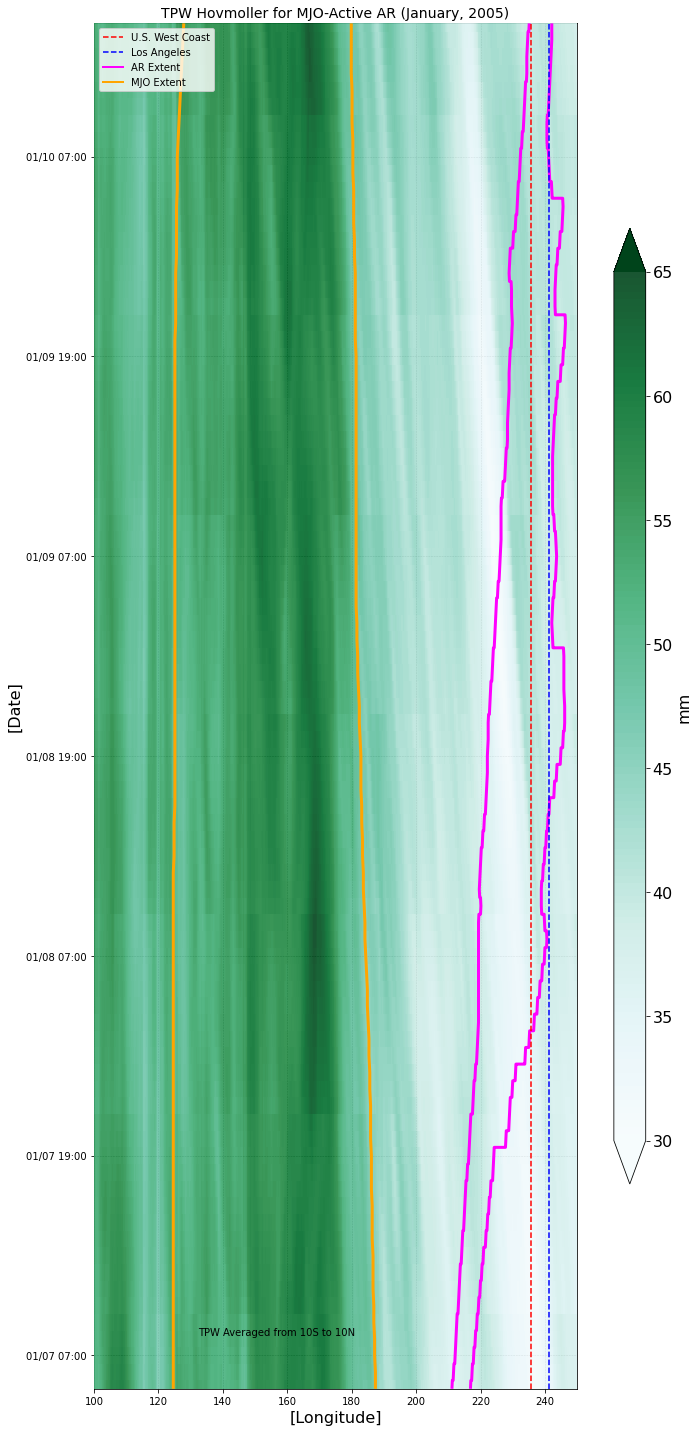

In [46]:
#try plotting again
#plot test
from scipy.ndimage import gaussian_filter
cm = 180

colormap = cmaps.MPL_BuGn
fig, ax = plt.subplots(figsize=[10, 20])


ax.set_title('TPW Hovmoller for MJO-Active AR (January, 2005)', fontsize=14, zorder=26)					   


css=ax.pcolormesh(tpw_plot_mean['longitude'].values, tpw_plot_mean['time'].values, tpw_plot_mean, cmap = colormap, zorder=21, vmin=30,vmax=65, alpha=.9)

ax.contour(mask_lon, mask_time, hovmoller_mask, [0.5], colors=('magenta',),zorder=23, linewidths=3)
ax.contour(hovmoller_mjo['lon'], hovmoller_mjo['time'], hovmoller_mjo, [0.5], colors=('orange',),zorder=23, linewidths=3)

x_val1 = 235.606
x_val2 = 241.34

# Add vertical lines
west_bound=ax.axvline(x=x_val1, color='red', linestyle='--', linewidth=1.5, label='U.S. West Coast', zorder=26)
LA_bound=ax.axvline(x=x_val2, color='blue', linestyle='--', linewidth=1.5, label='Los Angeles', zorder=26)

# Create a proxy artist for the legend
ar_css = mlines.Line2D([], [], color='magenta', linewidth=2, label='AR Extent')
mjo_css = mlines.Line2D([], [], color='orange', linewidth=2, label='MJO Extent')



cbar = plt.colorbar(css, ax=ax,orientation='vertical',aspect=30, shrink=0.7, pad=0.06, extend='both')
cbar.ax.tick_params(labelsize=16)
cbar.set_label('mm', fontsize =16)
ax.set_xlabel('[Longitude]', fontsize=16)
ax.set_ylabel('[Date]', fontsize=16)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='k', zorder=30)

# Format y-axis (time axis) for every 6 hours
ax.yaxis.set_major_locator(mdates.HourLocator(interval=12))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
ax.set_xlim(100, 250)



legend=plt.legend(handles=[west_bound,LA_bound,ar_css,mjo_css], loc='upper left')
legend.set_zorder(26)

plt.figtext(0.28, .07, 'TPW Averaged from 10S to 10N', wrap=True)
# fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/MJO_Act_Case_Trop_Hov.png", dpi=350, bbox_inches='tight')
plt.tight_layout()
fig.show()

In [53]:
tpw_plot_mean_mid.max()

<xarray.DataArray 'TCWV' ()>
array(36.56301, dtype=float32)

<ipython-input-52-bd32b5848d57>:52: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


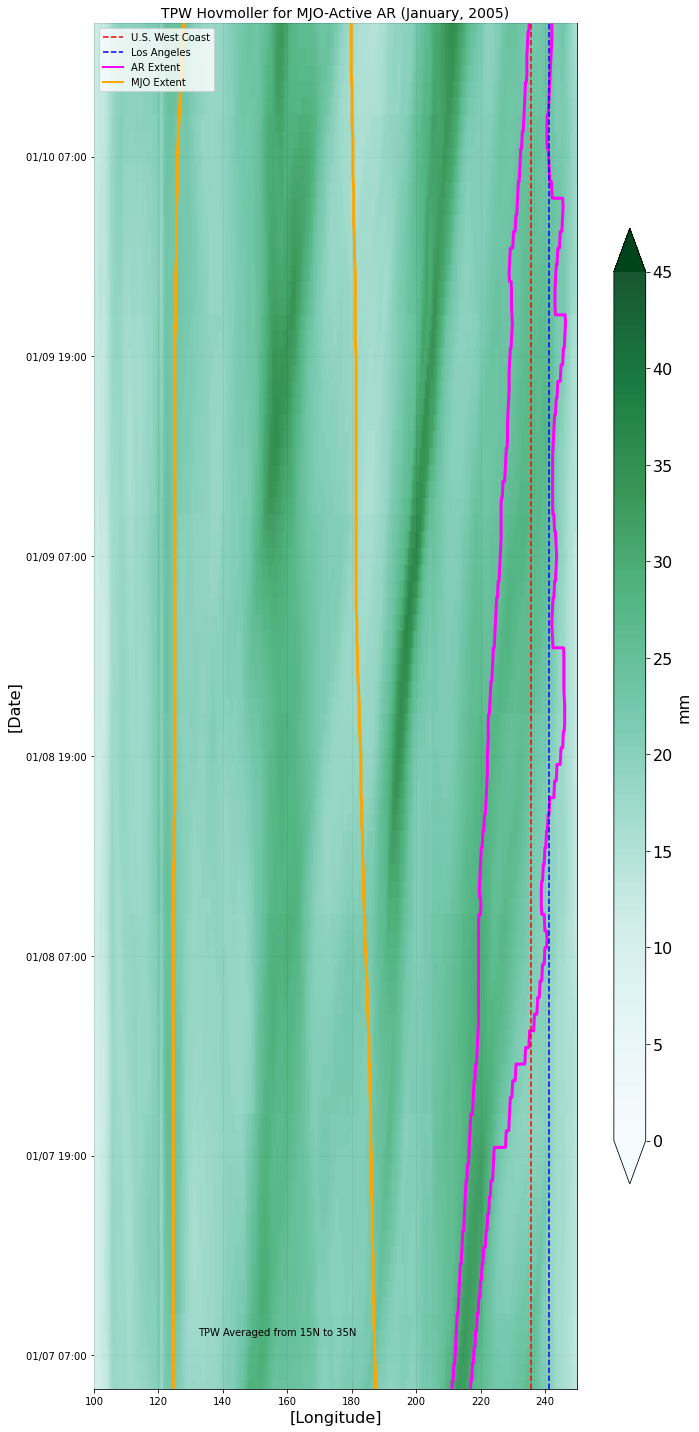

In [52]:
#try plotting again
#plot test
from scipy.ndimage import gaussian_filter
cm = 180

colormap = cmaps.MPL_BuGn
fig, ax = plt.subplots(figsize=[10, 20])


ax.set_title('TPW Hovmoller for MJO-Active AR (January, 2005)', fontsize=14, zorder=26)					   


css=ax.pcolormesh(tpw_plot_mean_mid['longitude'].values, tpw_plot_mean_mid['time'].values, tpw_plot_mean_mid, cmap = colormap, zorder=21, vmin=0,vmax=45, alpha=.9)

ax.contour(mask_lon, mask_time, hovmoller_mask, [0.5], colors=('magenta',),zorder=23, linewidths=3)
ax.contour(hovmoller_mjo['lon'], hovmoller_mjo['time'], hovmoller_mjo, [0.5], colors=('orange',),zorder=23, linewidths=3)

x_val1 = 235.606
x_val2 = 241.34

# Add vertical lines
west_bound=ax.axvline(x=x_val1, color='red', linestyle='--', linewidth=1.5, label='U.S. West Coast', zorder=26)
LA_bound=ax.axvline(x=x_val2, color='blue', linestyle='--', linewidth=1.5, label='Los Angeles', zorder=26)

# Create a proxy artist for the legend
ar_css = mlines.Line2D([], [], color='magenta', linewidth=2, label='AR Extent')
mjo_css = mlines.Line2D([], [], color='orange', linewidth=2, label='MJO Extent')



cbar = plt.colorbar(css, ax=ax,orientation='vertical',aspect=30, shrink=0.7, pad=0.06, extend='both')
cbar.ax.tick_params(labelsize=16)
cbar.set_label('mm', fontsize =16)
ax.set_xlabel('[Longitude]', fontsize=16)
ax.set_ylabel('[Date]', fontsize=16)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='k', zorder=30)

# Format y-axis (time axis) for every 6 hours
ax.yaxis.set_major_locator(mdates.HourLocator(interval=12))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
ax.set_xlim(100, 250)


legend=plt.legend(handles=[west_bound,LA_bound,ar_css,mjo_css], loc='upper left')
legend.set_zorder(26)

plt.figtext(0.28, .07, 'TPW Averaged from 15N to 35N', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/MJO_Act_Case_Mid_Hov_update_2025_07_18.png", dpi=350, bbox_inches='tight')
plt.tight_layout()
fig.show()

In [ ]:


fig, axes = plt.subplots(1, 2, figsize=(15, 20), sharey=True)

# Define colorbar limits
vmin1, vmax1 = 30, 65  # for first subplot (extend both)
vmin2, vmax2 = 0, 45   # for second subplot (extend max)

# Dataset format: 2-tuple (no mask) or 5-tuple (with mask)
datasets = [
    (tpw_plot_mean, 'Deep Tropics TPW Hovmoller for MJO-Active AR (January, 2005)', hovmoller_mjo, hovmoller_mjo['lon'], hovmoller_mjo['time']),
    (tpw_plot_mean_mid, 'Midlatitudes TPW Hovmoller for MJO-Active AR (January, 2005)', hovmoller_mask, mask_lon, mask_time)
]

annotations = ['TPW Averaged from 10S to 10N', 'TPW Averaged from 15N to 35N']
colorbar_limits = [(vmin1, vmax1), (vmin2, vmax2)]
colorbar_extends = ['both', 'max']  # new line for extension direction

legend_handles = []

for idx, (ax, data, annotation, (vmin, vmax), extend_dir) in enumerate(zip(axes, datasets, annotations, colorbar_limits, colorbar_extends)):
    tpw_data = data[0]
    title = data[1]
    has_mask = len(data) == 5

    colormap = cmaps.MPL_BuGn

    ax.set_title(title, fontsize=14, zorder=26)

    css = ax.pcolormesh(
        tpw_data['longitude'].values,
        tpw_data['time'].values,
        tpw_data,
        cmap=colormap,
        zorder=21,
        vmin=vmin, vmax=vmax,
        alpha=0.9
    )

    ar_css = None
    if has_mask:
        hov_mask, mask_lon, mask_time = data[2], data[3], data[4]
        ax.contour(mask_lon, mask_time, hov_mask, [0.5], colors='magenta', zorder=23, linewidths=3)
        ar_css = mlines.Line2D([], [], color='magenta', linewidth=2, label='AR Extent')

    # Vertical lines
    x_val1 = 235.606
    x_val2 = 241.34
    west_bound = ax.axvline(x=x_val1, color='red', linestyle='--', linewidth=1.5, label='U.S. West Coast', zorder=26)
    LA_bound = ax.axvline(x=x_val2, color='blue', linestyle='--', linewidth=1.5, label='Los Angeles', zorder=26)

    if idx == 1:
        # Save legend handles once
        legend_handles = [west_bound, LA_bound]
        if ar_css:
            legend_handles.append(ar_css)

    # Colorbar with customized extend direction
    cbar = plt.colorbar(css, ax=ax, orientation='vertical', aspect=30, shrink=0.7, pad=0.06, extend=extend_dir)
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label('mm', fontsize=16)

    ax.set_xlabel('[Longitude]', fontsize=16)
    if idx == 0:
        ax.set_ylabel('[Date]', fontsize=16)

    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='k', zorder=30)

    ax.yaxis.set_major_locator(mdates.HourLocator(interval=12))
    ax.yaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
    ax.set_xlim(100, 250)
    ax.tick_params(labelsize=14)

    # Annotation below each subplot
    ax.text(0.5, -0.05, annotation, fontsize=14, ha='center', va='top', transform=ax.transAxes)

# Shared legend in upper right of second subplot
legend = axes[0].legend(handles=legend_handles, loc='upper left', fontsize=14, frameon=True)
legend.set_zorder(30)

plt.tight_layout()
# fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/Non_MJO_Case_Combined_Hov_NEW_2025_07_18.png", dpi=350, bbox_inches='tight')
plt.show()


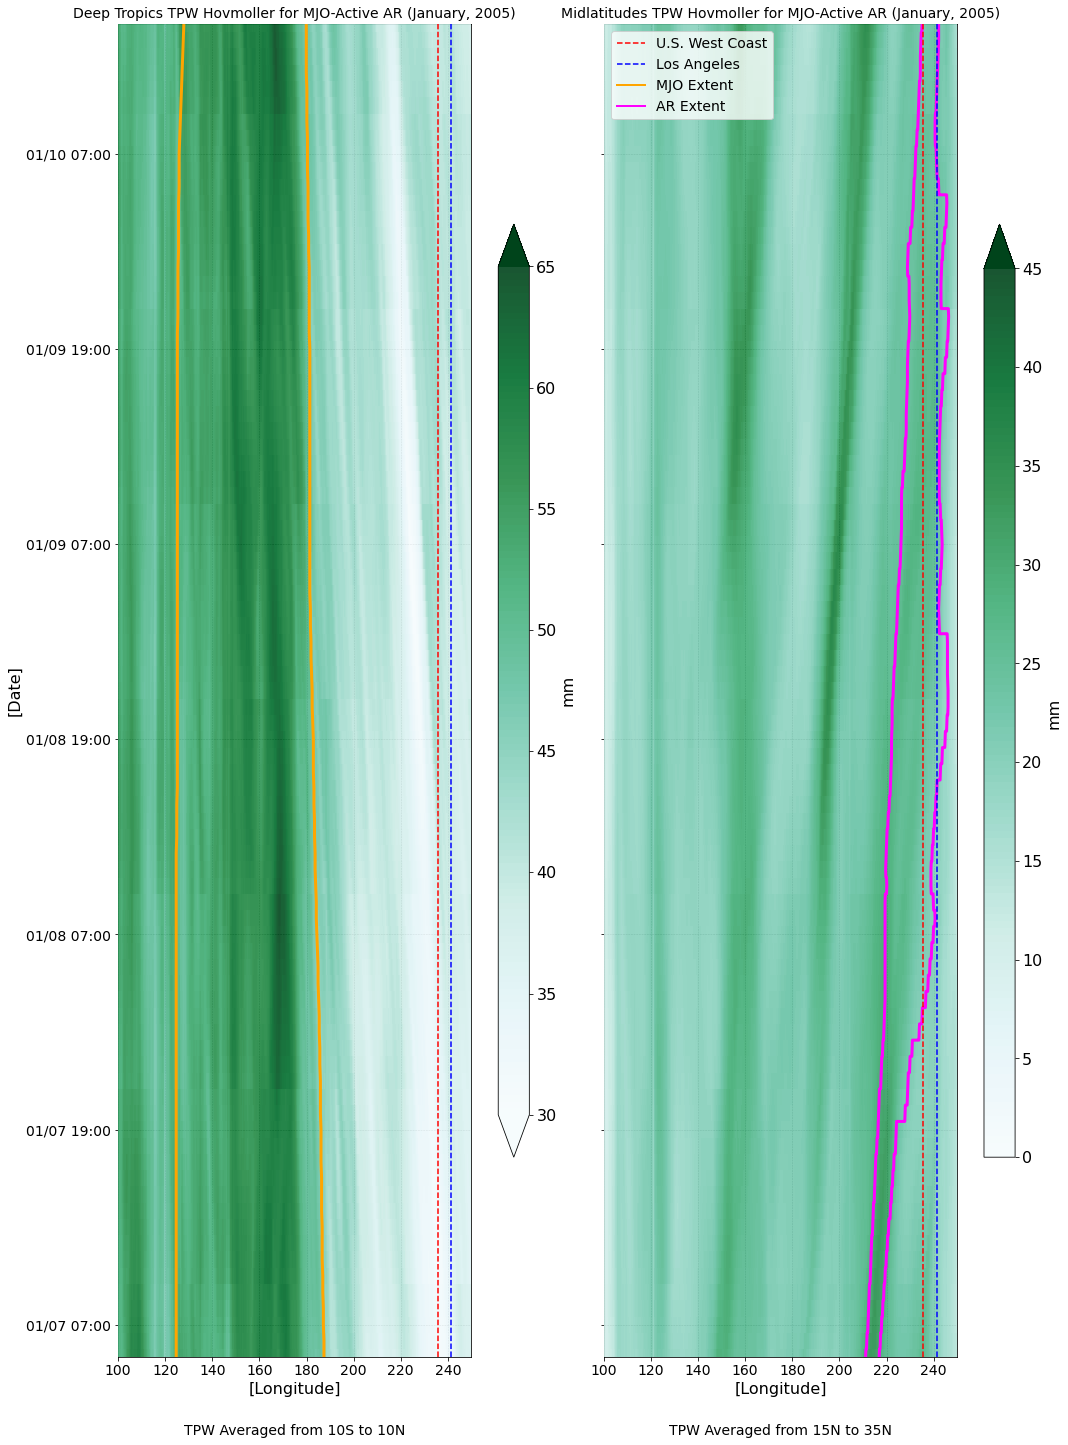

In [57]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import matplotlib.lines as mlines
# import cmaps  # Make sure this is installed
# import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(15, 20), sharey=True)

# Define colorbar limits and settings
vmin1, vmax1 = 30, 65  # for left subplot
vmin2, vmax2 = 0, 45   # for right subplot
colorbar_limits = [(vmin1, vmax1), (vmin2, vmax2)]
colorbar_extends = ['both', 'max']

# Define datasets and titles
datasets = [
    (tpw_plot_mean, 'Deep Tropics TPW Hovmoller for MJO-Active AR (January, 2005)'),
    (tpw_plot_mean_mid, 'Midlatitudes TPW Hovmoller for MJO-Active AR (January, 2005)')
]

annotations = ['TPW Averaged from 10S to 10N', 'TPW Averaged from 15N to 35N']

# Initialize list to collect legend handles
legend_handles = []

for idx, (ax, data, annotation, (vmin, vmax), extend_dir) in enumerate(zip(axes, datasets, annotations, colorbar_limits, colorbar_extends)):
    tpw_data = data[0]
    title = data[1]

    colormap = cmaps.MPL_BuGn
    ax.set_title(title, fontsize=14, zorder=26)

    css = ax.pcolormesh(
        tpw_data['longitude'].values,
        tpw_data['time'].values,
        tpw_data,
        cmap=colormap,
        zorder=21,
        vmin=vmin, vmax=vmax,
        alpha=0.9
    )

    # Add contour mask depending on subplot
    if idx == 0:
        # Left panel — MJO mask
        ax.contour(
            hovmoller_mjo['lon'], hovmoller_mjo['time'], hovmoller_mjo,
            levels=[0.5], colors='orange', linewidths=3, zorder=23
        )
        mjo_line = mlines.Line2D([], [], color='orange', linewidth=2, label='MJO Extent')

    elif idx == 1:
        # Right panel — AR mask
        ax.contour(
            mask_lon, mask_time, hovmoller_mask,
            levels=[0.5], colors='magenta', linewidths=3, zorder=23
        )
        ar_line = mlines.Line2D([], [], color='magenta', linewidth=2, label='AR Extent')

    # Add vertical lines to both plots
    x_val1 = 235.606
    x_val2 = 241.34
    west_bound = ax.axvline(x=x_val1, color='red', linestyle='--', linewidth=1.5, label='U.S. West Coast', zorder=26)
    LA_bound = ax.axvline(x=x_val2, color='blue', linestyle='--', linewidth=1.5, label='Los Angeles', zorder=26)

    # Only collect legend handles once (from left panel)
    if idx == 0:
        legend_handles = [west_bound, LA_bound, mjo_line]
    elif idx == 1:
        legend_handles.append(ar_line)

    # Colorbar setup
    cbar = plt.colorbar(css, ax=ax, orientation='vertical', aspect=30, shrink=0.7, pad=0.06, extend=extend_dir)
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label('mm', fontsize=16)

    ax.set_xlabel('[Longitude]', fontsize=16)
    if idx == 0:
        ax.set_ylabel('[Date]', fontsize=16)

    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='k', zorder=30)
    ax.yaxis.set_major_locator(mdates.HourLocator(interval=12))
    ax.yaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
    ax.set_xlim(100, 250)
    ax.tick_params(labelsize=14)

    # Subplot annotation
    ax.text(0.5, -0.05, annotation, fontsize=14, ha='center', va='top', transform=ax.transAxes)

# Shared legend in upper left of first subplot
legend = axes[1].legend(handles=legend_handles, loc='upper left', fontsize=14, frameon=True)
legend.set_zorder(30)

plt.tight_layout()
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/MJO_Act_Case_Combined_Hov_NEW_2025_07_18.png", dpi=350, bbox_inches='tight')
plt.show()


## MJO-Connected

#### AR/MJO Lifecycle

In [114]:
mjo_conn_djfm

AR ID (string)    Landfall Datetime  \
0    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2022-12-24T08:00:00   
1    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2017-01-04T08:00:00   
2    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2017-01-16T22:00:00   
3    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2017-01-10T02:00:00   
4    /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2006-01-03T13:00:00   
..                                                 ...                  ...   
100  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2023-02-10T01:00:00   
101  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2011-12-20T05:00:00   
102  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2014-01-18T15:00:00   
103  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2008-12-09T20:00:00   
104  /home/orca/bkerns/projects/mjo_lpt_and_ar/trac...  2014-01-15T19:00:00   

      Max ERM    Max IVT  End Season Year  Month  AR ID (Number)  
0    5.038845  2146.7937             2022     12          386.50  
1    3.531468   702.8931             2016      1          422.30  
2    3.337829  2063.2570             2016      1          438.50  
3    3.300837  1556.0400             2016      1          438.10  
4    3.237895  1791.0466             2005      1          402.40  
..        ...        ...              ...    ...             ...  
100  0.573124  1833.3120             2022      2          465.10  
101  0.517757  1742.2552             2011     12          380.30  
102  0.513015  1414.2023             2013      1          402.50  
103  0.473460  1429.2700             2008     12          158.43  
104  0.438557  1413.9075             2013      1          402.60  

[105 rows x 7 columns]

In [28]:
ary_test = xr.open_dataset(mjo_conn_djfm['AR ID (string)'].iloc[0])
mask_ary = ary_test['mask']

mask_lon = mask_ary['lon']
mask_lat = mask_ary['lat']

In [29]:
#create title string

start_year = str(mask_ary['time'][0].dt.year.values)
start_month = str(mask_ary['time'][0].dt.month.values)
start_day = str(mask_ary['time'][0].dt.day.values)
start_hour = str(mask_ary['time'][0].dt.hour.values)

start_dt_str = start_year+'-'+start_month+'-'+start_day+'-'+start_hour+':00'

end_year = str(mask_ary['time'][-1].dt.year.values)
end_month = str(mask_ary['time'][-1].dt.month.values)
end_day = str(mask_ary['time'][-1].dt.day.values)
end_hour = str(mask_ary['time'][-1].dt.hour.values)

end_dt_str = end_year+'-'+end_month+'-'+end_day+'-'+end_hour+':00'

In [30]:
#create list of times that start 5 days before AR onset

start_time = dt.datetime(2022, 12, 16, 17, 0)
end_time = dt.datetime(2023, 1, 1, 20, 0)
# end_time = dt.datetime(2024, 4, 30, 18, 0)

# Define the time delta of 6 hours
time_delta = timedelta(hours=1) #use 24 hours to grab all of the appropriate arrays

# Generate the list of datetimes
datetime_list = []

current_datetime = start_time
while current_datetime <= end_time:
    datetime_list.append(current_datetime)
    current_datetime += time_delta

In [31]:
#create a an array that just contains the MJO LPT mask data
# for the MJO data, let's add MJO development for an extra 5 days prior to the AR start time

mjo_bulk_hold = []

for jj in range(0,1):
    #get title of AR ID string
    NNNN=18
    t_len = len(str(mjo_conn_djfm['AR ID (string)'].iloc[jj]))
    lpt_id_tit=str(mjo_conn_djfm['AR ID (string)'].iloc[jj])[t_len - NNNN:]

    #get the string for the MJO lpt times
    MMMMMM = 59
    nn_len = 0
    year_str=str(mjo_conn_djfm['AR ID (string)'].iloc[jj])[nn_len - MMMMMM:-38]

    #open up mjo data
    mjo_test = xr.open_dataset('/home/orca/bkerns/lib/lpt/lpt-python-public/ERA5/data/era5/g20_72h/thresh12/systems/lpt_composite_mask_'+year_str+'_mjo_lpt.nc')
    mjo_mask=mjo_test['mask_with_filter_and_accumulation'] #pull this out the loop

    ar_test = xr.open_dataset(mjo_conn_djfm['AR ID (string)'].iloc[jj])

    for j in datetime_list:
        fin_time = j

        mjo_slice = mjo_mask.sel(**{TimeIndexer: slice(fin_time, fin_time)})

        mjo_bulk_hold += [mjo_slice]

mjo_array = xr.concat(mjo_bulk_hold, dim='time')

In [32]:
mjo_lon = mjo_array['lon']
mjo_lat = mjo_array['lat']
mask_ary = ary_test['mask']
mask_lon = mask_ary['lon']
mask_lat = mask_ary['lat']

/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0

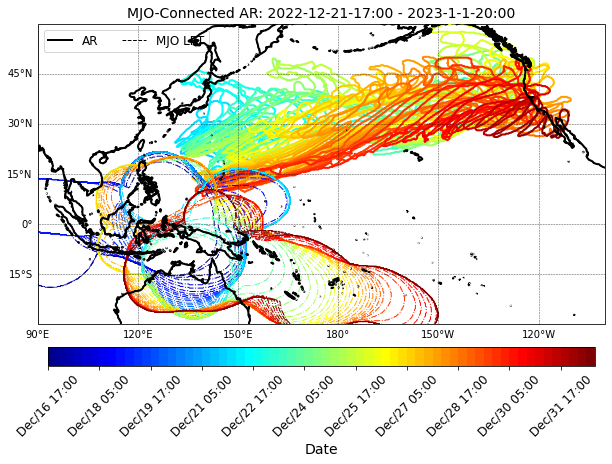

In [104]:
#plotting the MJO and AR Together
from scipy.ndimage import gaussian_filter
cm = 180


# Full MJO timeline (used for colorbar and plotting)
mjo_time = pd.to_datetime(mjo_array['time'].values)
ar_time = pd.to_datetime(mask_ary['time'].values)

# Define plotting time indices
step = 6
mjo_indices = np.arange(0, len(mjo_time), step)
selected_times = mjo_time[mjo_indices]


# Define colormap
cmap = cmaps.matlab_jet
norm = Normalize(vmin=mdates.date2num(selected_times[0]), vmax=mdates.date2num(selected_times[-1]))

# Create time → index mappings
ar_time_index = {t: i for i, t in enumerate(ar_time)}
mjo_time_index = {t: i for i, t in enumerate(mjo_time)}

# Keep a list of contour handles to create a colorbar later
contour_handles = []

fig = plt.figure(figsize=[14, 7])
political_boundaries = NaturalEarthFeature(category='cultural', name='admin_0_boundary_lines_land', scale='50m', facecolor='none')
states = NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=cm))


ax.set_title('MJO-Connected AR: '+start_dt_str+' - '+end_dt_str, fontsize=14, zorder = 26)					   
ax.add_feature(cartopy.feature.LAND, edgecolor='k', facecolor='none', zorder=24)
ax.coastlines('50m', linewidth=2, zorder=24)

minlon = 80 + cm
maxlon = -90 + cm

ax.set_extent([minlon, maxlon, -30, 60], ccrs.PlateCarree())

# Plot MJO contours for every time step
for i, t in enumerate(selected_times):
    mjo_idx = mjo_time_index[t]
    color = cmap(norm(mdates.date2num(t)))
    
    if np.any(mjo_array[mjo_idx]):
        ax.contour(
            mjo_lon, mjo_lat, mjo_array[mjo_idx], levels=[0.5],
            colors=[color], linewidths=1, transform=ccrs.PlateCarree(),
            linestyles='dashdot', zorder=13 + i * 0.01
        )

# Plot AR contours only where AR time overlaps with MJO time
for i, t in enumerate(selected_times):
    if t in ar_time_index:
        ar_idx = ar_time_index[t]
        color = cmap(norm(mdates.date2num(t)))
        
        if np.any(mask_ary[ar_idx]):
            ax.contour(
                mask_lon, mask_lat, mask_ary[ar_idx], levels=[0.5],
                colors=[color], linewidths=2, transform=ccrs.PlateCarree(),
                zorder=12 + i * 0.01
            )

        
# Create colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', aspect=30, shrink=0.7, pad=0.06)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Date', fontsize=14)

# Format ticks: Month/Day Hour:Min
num_ticks = 10  # adjust for spacing
tick_times = selected_times[::max(len(selected_times)//num_ticks, 1)]
tick_nums = mdates.date2num(tick_times)
tick_labels = [pd.to_datetime(t).strftime('%b/%d %H:%M') for t in tick_times]

cbar.set_ticks(tick_nums)
cbar.set_ticklabels(tick_labels, rotation=45)



#try adding gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                linewidth=0.5, color='k', alpha=0.7, linestyle='--', zorder=25)

gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 90, 15))

# Create custom legend handles
dashed_line = Line2D([0], [0], color='black', linewidth=1, linestyle='dashed', label='MJO LPT')
solid_line = Line2D([0], [0], color='black', linewidth=2, linestyle='-', label='AR')

# Add legend to the top center of the plot
ax.legend(handles=[solid_line, dashed_line], loc='upper left', fontsize=12, frameon=True, ncol=2)
# plt.legend()
# plt.clabel(cdssss, inline = True,
#            fontsize=13, fmt='%1.2f', colors = 'gray', zorder = 26)
# ax.text(0.9, 0.05, "IVT: every 50 kg/m/s starting at 150 kg/m/s.", ha='right', color='gray', fontweight='bold', transform=ax.transAxes, zorder=26)
# plt.figtext(0.28, .07, 'Composite of IVT from June 2000 through June 2004', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/MJO_Conn_Lifecycle_Map.png", dpi=350, bbox_inches='tight')
fig.show()

/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:844: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:850: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:180: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/numpy/lib/function_base.py:5392: 

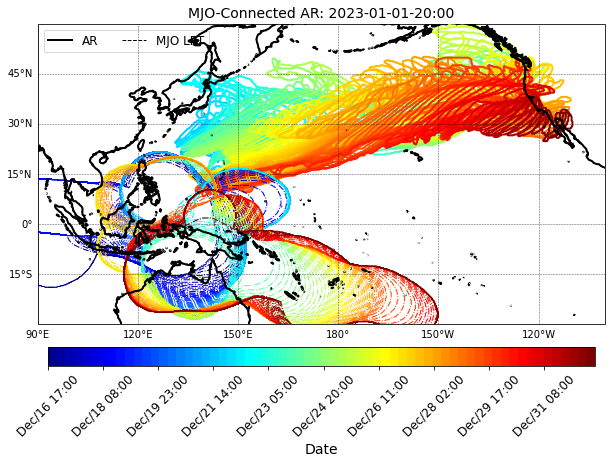

In [33]:
# Set up figure and map only once

from scipy.ndimage import gaussian_filter
cm = 180

# Full MJO timeline (used for colorbar and plotting)
mjo_time = pd.to_datetime(mjo_array['time'].values)
ar_time = pd.to_datetime(mask_ary['time'].values)

# Define plotting time indices
step = 3
mjo_indices = np.arange(0, len(mjo_time), step)
selected_times = mjo_time[mjo_indices]


# Create time → index mappings
ar_time_index = {t: i for i, t in enumerate(ar_time)}
mjo_time_index = {t: i for i, t in enumerate(mjo_time)}

fig = plt.figure(figsize=[14, 7])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=cm))

# Add map features
ax.add_feature(cartopy.feature.LAND, edgecolor='k', facecolor='none', zorder=24)
ax.coastlines('50m', linewidth=2, zorder=24)
ax.set_extent([80 + cm, -90 + cm, -30, 60], ccrs.PlateCarree())

# Gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='k', alpha=0.7, linestyle='--', zorder=25)
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 90, 15))

# Legend
solid_line = Line2D([0], [0], color='black', linewidth=2, linestyle='-', label='AR')
dashed_line = Line2D([0], [0], color='black', linewidth=1, linestyle='dashed', label='MJO LPT')
ax.legend(handles=[solid_line, dashed_line], loc='upper left', fontsize=12, frameon=True, ncol=2)

# Setup colorbar
cmap = cmaps.matlab_jet
norm = Normalize(vmin=mdates.date2num(selected_times[0]), vmax=mdates.date2num(selected_times[-1]))
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', aspect=30, shrink=0.7, pad=0.06)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Date', fontsize=14)

# Format ticks
num_ticks = 10
tick_times = selected_times[::max(len(selected_times)//num_ticks, 1)]
tick_nums = mdates.date2num(tick_times)
tick_labels = [pd.to_datetime(t).strftime('%b/%d %H:%M') for t in tick_times]
cbar.set_ticks(tick_nums)
cbar.set_ticklabels(tick_labels, rotation=45)

# Cumulative contour plotting
for i, t in enumerate(selected_times):
    color = cmap(norm(mdates.date2num(t)))
    
    # Plot MJO contour
    if t in mjo_time_index:
        mjo_idx = mjo_time_index[t]
        if np.any(mjo_array[mjo_idx]):
            ax.contour(
                mjo_lon, mjo_lat, mjo_array[mjo_idx], levels=[0.5],
                colors=[color], linewidths=1, transform=ccrs.PlateCarree(),
                linestyles='dashdot', zorder=13 + i * 0.01
            )

    # Plot AR contour
    if t in ar_time_index:
        ar_idx = ar_time_index[t]
        if np.any(mask_ary[ar_idx]):
            ax.contour(
                mask_lon, mask_lat, mask_ary[ar_idx], levels=[0.5],
                colors=[color], linewidths=2, transform=ccrs.PlateCarree(),
                zorder=12 + i * 0.01
            )
    
    # Save frame
    dt_str = pd.to_datetime(t).strftime('%Y-%m-%d-%H:%M')
    ax.set_title('MJO-Connected AR: '+dt_str, fontsize=14, zorder = 26)

    # Save frame with cumulative contours
    fig.savefig(f'/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/anim/MJO_Conn/AR_{dt_str}.png',
                dpi=350, bbox_inches='tight')


### Moisture Hovmoller

In [105]:
tpw_stack = []

for xxxxxxx in range(0,len(ary_test['time'])):



    dt1 = pd.to_datetime(ary_test['time'].values[xxxxxxx])
    moi = str(dt1.month).rjust(2, '0')
    doi = str(dt1.day).rjust(2, '0')
    hoi = str(dt1.hour).rjust(2, '0')
    yoi = str(dt1.year)

    ldom = str(calendar.monthrange(dt1.year, dt1.month)[1]) #last day of month

    mask_ary = ary_test['mask'][xxxxxxx]
    mask_lon = ary_test['lon']
    mask_lat = ary_test['lat']




    #bring in mjo data
    fin_time = dt1
    year = dt1.year


    #bring in TPW data
    max_lat =10
    min_lat=-10
    min_lon=100 #-113.75
    max_lon=250 #-125.5

    tpw_test = xr.open_dataset('/home/orca/data/model_anal/era5/from_rda/tcwv/e5.oper.an.sfc.128_137_tcwv.ll025sc.'+yoi+moi+'0100_'+yoi+moi+ldom+'23.nc')

    LatIndexer, LonIndexer, TimeIndexer  = 'latitude', 'longitude', 'time'
    tpw_slice = tpw_test.sel(**{LatIndexer: slice(max_lat, min_lat),
                                LonIndexer: slice(min_lon, max_lon),
                    TimeIndexer: slice(dt1,dt1)})
    tpw_ary = tpw_slice['TCWV']

    tpw_stack += [tpw_ary]



In [106]:
## TPW for midlatitudes!!!
tpw_stack_mid = []

for xxxxxxx in range(0,len(ary_test['time'])):
# for xxxxxxx in range(0,43,3):
# for xxxxxxx in range(0,1):
# for xxxxxxx in ar_dates_to_plot[0:1]:


    dt1 = pd.to_datetime(ary_test['time'].values[xxxxxxx])
    moi = str(dt1.month).rjust(2, '0')
    doi = str(dt1.day).rjust(2, '0')
    hoi = str(dt1.hour).rjust(2, '0')
    yoi = str(dt1.year)

    ldom = str(calendar.monthrange(dt1.year, dt1.month)[1]) #last day of month

    mask_ary = ary_test['mask'][xxxxxxx]
    mask_lon = ary_test['lon']
    mask_lat = ary_test['lat']




    #bring in mjo data
    fin_time = dt1
    year = dt1.year



    #bring in TPW data
    max_lat =50
    min_lat=30
    min_lon=100 #-113.75
    max_lon=250 #-125.5

    tpw_test = xr.open_dataset('/home/orca/data/model_anal/era5/from_rda/tcwv/e5.oper.an.sfc.128_137_tcwv.ll025sc.'+yoi+moi+'0100_'+yoi+moi+ldom+'23.nc')

    LatIndexer, LonIndexer, TimeIndexer  = 'latitude', 'longitude', 'time'
    tpw_slice = tpw_test.sel(**{LatIndexer: slice(max_lat, min_lat),
                                LonIndexer: slice(min_lon, max_lon),
                    TimeIndexer: slice(dt1,dt1)})
    tpw_ary = tpw_slice['TCWV']

    tpw_stack_mid += [tpw_ary]




In [107]:
mjo_lpt_stack = []

for xxxxxxx in range(0,1):
    
  NNNN=18
  t_len = len(str(mjo_conn_djfm['AR ID (string)'].iloc[xxxxxxx]))
  lpt_id_tit=str(mjo_conn_djfm['AR ID (string)'].iloc[xxxxxxx])[t_len - NNNN:]

  #get the string for the MJO lpt times
  MMMMMM = 59
  nn_len = 0
  year_str=str(mjo_conn_djfm['AR ID (string)'].iloc[xxxxxxx])[nn_len - MMMMMM:-38]
 #open up mjo data
  mjo_test = xr.open_dataset('/home/orca/bkerns/lib/lpt/lpt-python-public/ERA5/data/era5/g20_72h/thresh12/systems/lpt_composite_mask_'+year_str+'_mjo_lpt.nc')
  mjo_mask=mjo_test['mask_with_filter_and_accumulation'] #pull this out the loop

  for llllll in range(0,len(ary_test['time'])):

    TimeIndexer = 'time'
    dt1 = pd.to_datetime(ary_test['time'].values[llllll])
    mjo_slice = mjo_mask.sel(**{TimeIndexer: slice(dt1, dt1)})

    mjo_lpt_stack += [mjo_slice]

In [108]:
tpw_array = xr.concat(tpw_stack, dim="time")
mjo_array = xr.concat(mjo_lpt_stack, dim="time")
tpw_plot_mean = tpw_array.mean(dim='latitude')
mask_ary=ary_test['mask']

mask_lon=mask_ary['lon']
mask_time = mask_ary['time']

tpw_array_mid = xr.concat(tpw_stack_mid, dim="time")
# I need to average the above array such that I have the time, longitude, and the mean latitudinal tpw along each lon

tpw_plot_mean_mid = tpw_array_mid.mean(dim='latitude')

In [109]:
# Assuming your 3D DataArray is called `mask_ary` with dims ('time', 'lat', 'lon')
hovmoller_mask = (mask_ary == 1).any(dim='lat')
hovmoller_mask = hovmoller_mask.astype(int)

#make MJO LPt hovmoller
hovmoller_mjo = (mjo_array == 1).any(dim='lat')
hovmoller_mjo = hovmoller_mjo.astype(int)

<ipython-input-111-7b6a7c547f20>:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


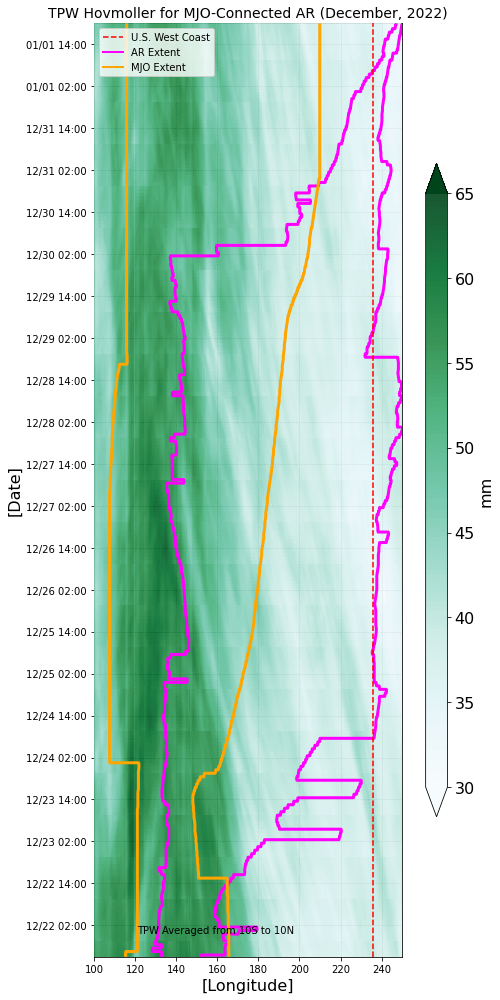

In [111]:
#try plotting again
#plot test
from scipy.ndimage import gaussian_filter
cm = 180

colormap = cmaps.MPL_BuGn
fig, ax = plt.subplots(figsize=[7, 14])


ax.set_title('TPW Hovmoller for MJO-Connected AR (December, 2022)', fontsize=14, zorder=26)					   


css=ax.pcolormesh(tpw_plot_mean['longitude'].values, tpw_plot_mean['time'].values, tpw_plot_mean, cmap = colormap, zorder=21, vmin=30,vmax=65, alpha=.9)

ax.contour(mask_lon, mask_time, hovmoller_mask, [0.5], colors=('magenta',),zorder=23, linewidths=3)
ax.contour(hovmoller_mjo['lon'], hovmoller_mjo['time'], hovmoller_mjo, [0.5], colors=('orange',),zorder=23, linewidths=3)

x_val1 = 235.606
x_val2 = 241.34

# Add vertical lines
west_bound=ax.axvline(x=x_val1, color='red', linestyle='--', linewidth=1.5, label='U.S. West Coast', zorder=26)
# LA_bound=ax.axvline(x=x_val2, color='blue', linestyle='--', linewidth=1.5, label='Los Angeles', zorder=26)

# Create a proxy artist for the legend
ar_css = mlines.Line2D([], [], color='magenta', linewidth=2, label='AR Extent')
mjo_css = mlines.Line2D([], [], color='orange', linewidth=2, label='MJO Extent')



cbar = plt.colorbar(css, ax=ax,orientation='vertical',aspect=30, shrink=0.7, pad=0.06, extend='both')
cbar.ax.tick_params(labelsize=16)
cbar.set_label('mm', fontsize =16)
ax.set_xlabel('[Longitude]', fontsize=16)
ax.set_ylabel('[Date]', fontsize=16)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='k', zorder=30)

# Format y-axis (time axis) for every 6 hours
ax.yaxis.set_major_locator(mdates.HourLocator(interval=12))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
ax.set_xlim(100, 250)



legend=plt.legend(handles=[west_bound,ar_css,mjo_css], loc='upper left')
legend.set_zorder(26)

plt.figtext(0.28, .07, 'TPW Averaged from 10S to 10N', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/MJO_Conn_Case_Trop_Hov.png", dpi=350, bbox_inches='tight')
plt.tight_layout()
fig.show()

<ipython-input-113-156afef2f472>:52: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


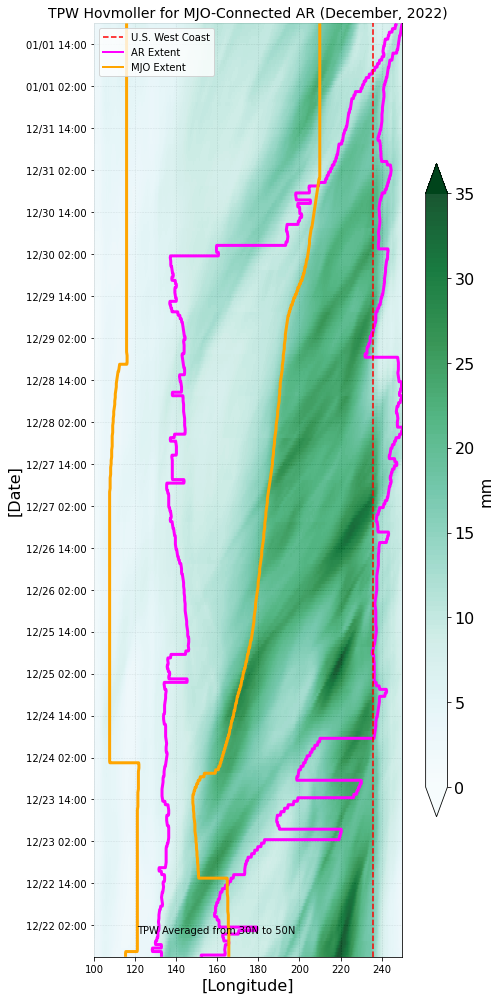

In [113]:
#try plotting again
#plot test
from scipy.ndimage import gaussian_filter
cm = 180

colormap = cmaps.MPL_BuGn
fig, ax = plt.subplots(figsize=[7, 14])


ax.set_title('TPW Hovmoller for MJO-Connected AR (December, 2022)', fontsize=14, zorder=26)					   


css=ax.pcolormesh(tpw_plot_mean_mid['longitude'].values, tpw_plot_mean_mid['time'].values, tpw_plot_mean_mid, cmap = colormap, zorder=21, vmin=0,vmax=35, alpha=.9)

ax.contour(mask_lon, mask_time, hovmoller_mask, [0.5], colors=('magenta',),zorder=23, linewidths=3)
ax.contour(hovmoller_mjo['lon'], hovmoller_mjo['time'], hovmoller_mjo, [0.5], colors=('orange',),zorder=23, linewidths=3)

x_val1 = 235.606
x_val2 = 241.34

# Add vertical lines
west_bound=ax.axvline(x=x_val1, color='red', linestyle='--', linewidth=1.5, label='U.S. West Coast', zorder=26)
# LA_bound=ax.axvline(x=x_val2, color='blue', linestyle='--', linewidth=1.5, label='Los Angeles', zorder=26)

# Create a proxy artist for the legend
ar_css = mlines.Line2D([], [], color='magenta', linewidth=2, label='AR Extent')
mjo_css = mlines.Line2D([], [], color='orange', linewidth=2, label='MJO Extent')



cbar = plt.colorbar(css, ax=ax,orientation='vertical',aspect=30, shrink=0.7, pad=0.06, extend='both')
cbar.ax.tick_params(labelsize=16)
cbar.set_label('mm', fontsize =16)
ax.set_xlabel('[Longitude]', fontsize=16)
ax.set_ylabel('[Date]', fontsize=16)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='k', zorder=30)

# Format y-axis (time axis) for every 6 hours
ax.yaxis.set_major_locator(mdates.HourLocator(interval=12))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
ax.set_xlim(100, 250)


legend=plt.legend(handles=[west_bound,ar_css,mjo_css], loc='upper left')
legend.set_zorder(26)

plt.figtext(0.28, .07, 'TPW Averaged from 30N to 50N', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/MJO_Conn_Case_Mid_Hov.png", dpi=350, bbox_inches='tight')
plt.tight_layout()
fig.show()

### Moisture Hovmoller UPDATE

In [58]:
mjo_conn_djfm['AR ID (string)'].iloc[0]

'/home/orca/bkerns/projects/mjo_lpt_and_ar/tracking/lpt-python-public/ar.testing7.merge_split/data/ar/g0_0h/thresh1/systems/2022060100_2023063023/lpt_system_mask_ar.lptid00386.5000.nc'

In [59]:
ary_test = xr.open_dataset('/home/orca/bkerns/projects/mjo_lpt_and_ar/tracking/lpt-python-public-2024/ar.testing7.merge_split/data/ar/g0_0h/thresh1/systems/2022060100_2023063023/lpt_system_mask_ar.lptid00386.5000.nc')
mask_ary = ary_test['mask']

mask_lon = mask_ary['lon']
mask_lat = mask_ary['lat']

In [61]:
tpw_stack = []

for xxxxxxx in range(0,len(ary_test['time'])):



    dt1 = pd.to_datetime(ary_test['time'].values[xxxxxxx])
    moi = str(dt1.month).rjust(2, '0')
    doi = str(dt1.day).rjust(2, '0')
    hoi = str(dt1.hour).rjust(2, '0')
    yoi = str(dt1.year)

    ldom = str(calendar.monthrange(dt1.year, dt1.month)[1]) #last day of month

    mask_ary = ary_test['mask'][xxxxxxx]
    mask_lon = ary_test['lon']
    mask_lat = ary_test['lat']




    #bring in mjo data
    fin_time = dt1
    year = dt1.year


    #bring in TPW data
    max_lat =10
    min_lat=-10
    min_lon=100 #-113.75
    max_lon=250 #-125.5

    tpw_test = xr.open_dataset('/home/orca/data/model_anal/era5/from_rda/tcwv/e5.oper.an.sfc.128_137_tcwv.ll025sc.'+yoi+moi+'0100_'+yoi+moi+ldom+'23.nc')

    LatIndexer, LonIndexer, TimeIndexer  = 'latitude', 'longitude', 'time'
    tpw_slice = tpw_test.sel(**{LatIndexer: slice(max_lat, min_lat),
                                LonIndexer: slice(min_lon, max_lon),
                    TimeIndexer: slice(dt1,dt1)})
    tpw_ary = tpw_slice['TCWV']

    tpw_stack += [tpw_ary]



In [62]:
## TPW for midlatitudes!!!
tpw_stack_mid = []

for xxxxxxx in range(0,len(ary_test['time'])):
# for xxxxxxx in range(0,43,3):
# for xxxxxxx in range(0,1):
# for xxxxxxx in ar_dates_to_plot[0:1]:


    dt1 = pd.to_datetime(ary_test['time'].values[xxxxxxx])
    moi = str(dt1.month).rjust(2, '0')
    doi = str(dt1.day).rjust(2, '0')
    hoi = str(dt1.hour).rjust(2, '0')
    yoi = str(dt1.year)

    ldom = str(calendar.monthrange(dt1.year, dt1.month)[1]) #last day of month

    mask_ary = ary_test['mask'][xxxxxxx]
    mask_lon = ary_test['lon']
    mask_lat = ary_test['lat']




    #bring in mjo data
    fin_time = dt1
    year = dt1.year



    #bring in TPW data
    max_lat =50
    min_lat=30
    min_lon=100 #-113.75
    max_lon=250 #-125.5

    tpw_test = xr.open_dataset('/home/orca/data/model_anal/era5/from_rda/tcwv/e5.oper.an.sfc.128_137_tcwv.ll025sc.'+yoi+moi+'0100_'+yoi+moi+ldom+'23.nc')

    LatIndexer, LonIndexer, TimeIndexer  = 'latitude', 'longitude', 'time'
    tpw_slice = tpw_test.sel(**{LatIndexer: slice(max_lat, min_lat),
                                LonIndexer: slice(min_lon, max_lon),
                    TimeIndexer: slice(dt1,dt1)})
    tpw_ary = tpw_slice['TCWV']

    tpw_stack_mid += [tpw_ary]




In [63]:
mjo_lpt_stack = []

for xxxxxxx in range(0,1):
    
  NNNN=18
  t_len = len(str(mjo_conn_djfm['AR ID (string)'].iloc[xxxxxxx]))
  lpt_id_tit=str(mjo_conn_djfm['AR ID (string)'].iloc[xxxxxxx])[t_len - NNNN:]

  #get the string for the MJO lpt times
  MMMMMM = 59
  nn_len = 0
  year_str=str(mjo_conn_djfm['AR ID (string)'].iloc[xxxxxxx])[nn_len - MMMMMM:-38]
 #open up mjo data
  mjo_test = xr.open_dataset('/home/orca/bkerns/lib/lpt/lpt-python-public/ERA5/data/era5/g20_72h/thresh12/systems/lpt_composite_mask_'+year_str+'_mjo_lpt.nc')
  mjo_mask=mjo_test['mask_with_filter_and_accumulation'] #pull this out the loop

  for llllll in range(0,len(ary_test['time'])):

    TimeIndexer = 'time'
    dt1 = pd.to_datetime(ary_test['time'].values[llllll])
    mjo_slice = mjo_mask.sel(**{TimeIndexer: slice(dt1, dt1)})

    mjo_lpt_stack += [mjo_slice]

In [64]:
tpw_array = xr.concat(tpw_stack, dim="time")
mjo_array = xr.concat(mjo_lpt_stack, dim="time")
tpw_plot_mean = tpw_array.mean(dim='latitude')
mask_ary=ary_test['mask']

mask_lon=mask_ary['lon']
mask_time = mask_ary['time']

tpw_array_mid = xr.concat(tpw_stack_mid, dim="time")
# I need to average the above array such that I have the time, longitude, and the mean latitudinal tpw along each lon

tpw_plot_mean_mid = tpw_array_mid.mean(dim='latitude')

In [65]:
# Assuming your 3D DataArray is called `mask_ary` with dims ('time', 'lat', 'lon')
hovmoller_mask = (mask_ary == 1).any(dim='lat')
hovmoller_mask = hovmoller_mask.astype(int)

#make MJO LPt hovmoller
hovmoller_mjo = (mjo_array == 1).any(dim='lat')
hovmoller_mjo = hovmoller_mjo.astype(int)

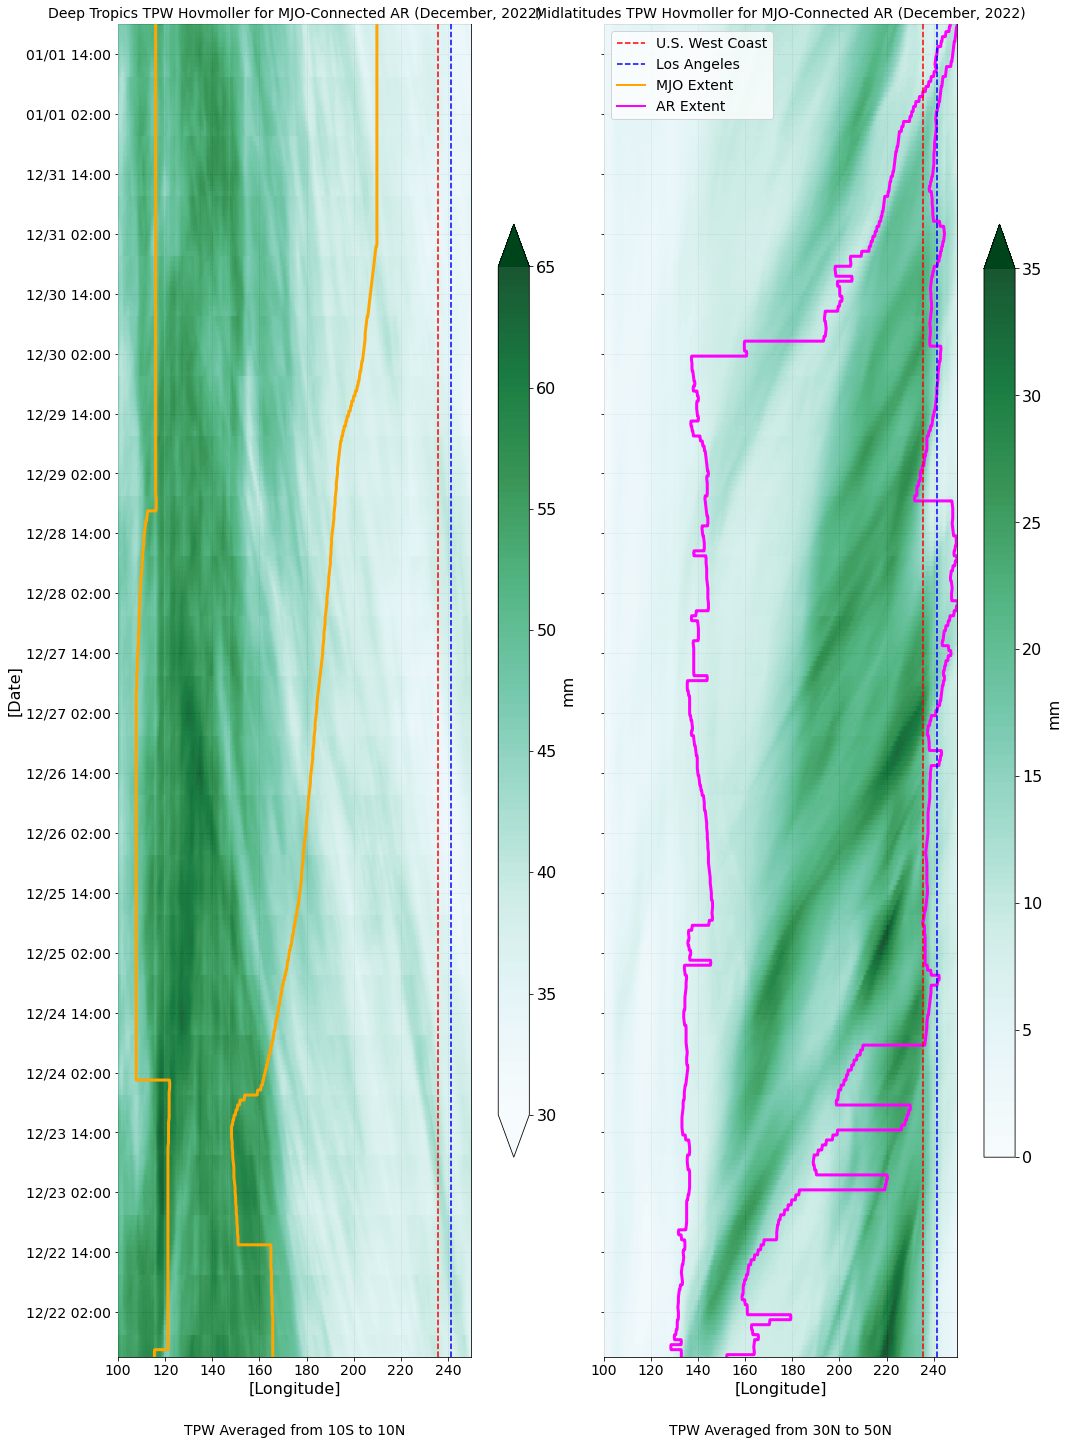

In [67]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import matplotlib.lines as mlines
# import cmaps  # Make sure this is installed
# import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(15, 20), sharey=True)

# Define colorbar limits and settings
vmin1, vmax1 = 30, 65  # for left subplot
vmin2, vmax2 = 0, 35   # for right subplot
colorbar_limits = [(vmin1, vmax1), (vmin2, vmax2)]
colorbar_extends = ['both', 'max']

# Define datasets and titles
datasets = [
    (tpw_plot_mean, 'Deep Tropics TPW Hovmoller for MJO-Connected AR (December, 2022)'),
    (tpw_plot_mean_mid, 'Midlatitudes TPW Hovmoller for MJO-Connected AR (December, 2022)')
]

annotations = ['TPW Averaged from 10S to 10N', 'TPW Averaged from 30N to 50N']

# Initialize list to collect legend handles
legend_handles = []

for idx, (ax, data, annotation, (vmin, vmax), extend_dir) in enumerate(zip(axes, datasets, annotations, colorbar_limits, colorbar_extends)):
    tpw_data = data[0]
    title = data[1]

    colormap = cmaps.MPL_BuGn
    ax.set_title(title, fontsize=14, zorder=26)

    css = ax.pcolormesh(
        tpw_data['longitude'].values,
        tpw_data['time'].values,
        tpw_data,
        cmap=colormap,
        zorder=21,
        vmin=vmin, vmax=vmax,
        alpha=0.9
    )

    # Add contour mask depending on subplot
    if idx == 0:
        # Left panel — MJO mask
        ax.contour(
            hovmoller_mjo['lon'], hovmoller_mjo['time'], hovmoller_mjo,
            levels=[0.5], colors='orange', linewidths=3, zorder=23
        )
        mjo_line = mlines.Line2D([], [], color='orange', linewidth=2, label='MJO Extent')

    elif idx == 1:
        # Right panel — AR mask
        ax.contour(
            mask_lon, mask_time, hovmoller_mask,
            levels=[0.5], colors='magenta', linewidths=3, zorder=23
        )
        ar_line = mlines.Line2D([], [], color='magenta', linewidth=2, label='AR Extent')

    # Add vertical lines to both plots
    x_val1 = 235.606
    x_val2 = 241.34
    west_bound = ax.axvline(x=x_val1, color='red', linestyle='--', linewidth=1.5, label='U.S. West Coast', zorder=26)
    LA_bound = ax.axvline(x=x_val2, color='blue', linestyle='--', linewidth=1.5, label='Los Angeles', zorder=26)

    # Only collect legend handles once (from left panel)
    if idx == 0:
        legend_handles = [west_bound, LA_bound, mjo_line]
    elif idx == 1:
        legend_handles.append(ar_line)

    # Colorbar setup
    cbar = plt.colorbar(css, ax=ax, orientation='vertical', aspect=30, shrink=0.7, pad=0.06, extend=extend_dir)
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label('mm', fontsize=16)

    ax.set_xlabel('[Longitude]', fontsize=16)
    if idx == 0:
        ax.set_ylabel('[Date]', fontsize=16)

    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='k', zorder=30)
    ax.yaxis.set_major_locator(mdates.HourLocator(interval=12))
    ax.yaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
    ax.set_xlim(100, 250)
    ax.tick_params(labelsize=14)

    # Subplot annotation
    ax.text(0.5, -0.05, annotation, fontsize=14, ha='center', va='top', transform=ax.transAxes)

# Shared legend in upper left of first subplot
legend = axes[1].legend(handles=legend_handles, loc='upper left', fontsize=14, frameon=True)
legend.set_zorder(30)

plt.tight_layout()
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Extremes_Cases/MJO_Conn_Case_Combined_Hov_NEW_2025_07_18.png", dpi=350, bbox_inches='tight')
plt.show()
